In [1]:
from os import path
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
from skimage import io
import numpy as np 

plt.rcParams["font.family"] = ""

In [2]:
track_df = pd.read_pickle('/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/track_df_updated.pkl')
filtered_tracks = pd.read_pickle('/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/filtered_tracks.pkl')

In [3]:
#divide into lifetime cohorts
#lifetimeCohorts = [[5,15],[16,25],[26,35],[36,45],[46,60]]
#drop all tracks below 5 frames (keep ones with 5 frames)
##from pylattice most tracks between 34-68seconds 
##second most tracks 0-34seconds
##third most 68-100seconds 
##few tracks above 100seconds 
##few tracks above this 

In [4]:
filtered_tracks.head()

,track_id,c2_peak,c3_peak,track_length,start_frame,end_frame,peak_frame_c2,peak_start_c2,peak_frame_c3,peak_start_c3
5,36,202.0,299.000000,34,0,33,17,17,25,25
17,73,224.0,345.835302,8,0,7,6,6,6,6
25,91,326.0,300.333333,21,0,20,19,19,17,17
49,145,181.0,258.333333,20,0,19,14,14,10,10
58,155,231.0,335.000000,12,0,11,4,4,7,7


In [5]:
filtered_tracks = filtered_tracks[filtered_tracks['track_length'] > 4]

In [6]:
#Get the max length
filtered_tracks['track_length'].max()

60

In [7]:
def filter_track_ids_by_length_ranges(df):
    length_ranges = [[5, 10], [11,15], [16, 25], [26, 35], [36, 45], [46, 60]]
    
    # Create an empty dictionary to store track IDs for each length range
    track_ids_dict = {f'Length_{low}_{high}': [] for low, high in length_ranges}
    
    # Iterate through each row in the DataFrame
    for _, row in df.iterrows():
        track_id = row['track_id']
        track_length = row['track_length']
        
        # Check if track_length falls within any of the specified ranges
        for i, (low, high) in enumerate(length_ranges):
            if low <= track_length <= high:
                key = f'Length_{low}_{high}'
                track_ids_dict[key].append(track_id)
    
    # Convert the dictionary values to arrays
    track_id_arrays = [track_ids_dict[key] for key in track_ids_dict]
    
    return track_id_arrays

In [8]:
track_id_arrays = filter_track_ids_by_length_ranges(filtered_tracks)

In [9]:
print(f'number of tracks between [5,10] inclusive are {len(track_id_arrays[0])}')
print(f'number of tracks between [11,15] inclusive are {len(track_id_arrays[1])}')
print(f'number of tracks between [16,25] inclusive are {len(track_id_arrays[2])}')
print(f'number of tracks between [26,35] inclusive are {len(track_id_arrays[3])}')
print(f'number of tracks between [36,45] inclusive are {len(track_id_arrays[4])}')
print(f'number of tracks between [46,60] inclusive are {len(track_id_arrays[5])}')

number of tracks between [5,10] inclusive are 78
number of tracks between [11,15] inclusive are 106
number of tracks between [16,25] inclusive are 101
number of tracks between [26,35] inclusive are 25
number of tracks between [36,45] inclusive are 15
number of tracks between [46,60] inclusive are 6


In [10]:
def random_track_ids(df, desired_length, num_to_select=16):
    """
    Randomly selects track_ids of a desired length from a DataFrame.

    Parameters:
    - df: DataFrame with 'track_id' and 'length' columns.
    - desired_length: The desired length of tracks to select.
    - num_to_select: The number of track_ids to randomly select (default is 16).

    Returns:
    - List of randomly selected track_ids.
    """
    # Filter the DataFrame for tracks with the desired length
    tracks_of_desired_length = df[(df['track_length'] >= desired_length[0]) & 
                                  (df['track_length'] <= desired_length[1]) ]

    # Determine the number of tracks available for the desired length
    num_tracks_available = len(tracks_of_desired_length)

    # Determine the number of tracks to randomly select (minimum of num_to_select or available tracks)
    num_tracks_to_select = min(num_to_select, num_tracks_available)

    if num_tracks_to_select > 0:
        # Randomly select track_ids
        selected_track_ids = np.random.choice(tracks_of_desired_length['track_id'], num_tracks_to_select, replace=False)
        return selected_track_ids
    else:
        print(f"No tracks of length {desired_length} available.")
        return []

In [11]:
selected_tracks = random_track_ids(filtered_tracks, desired_length = [5,10], num_to_select=64)

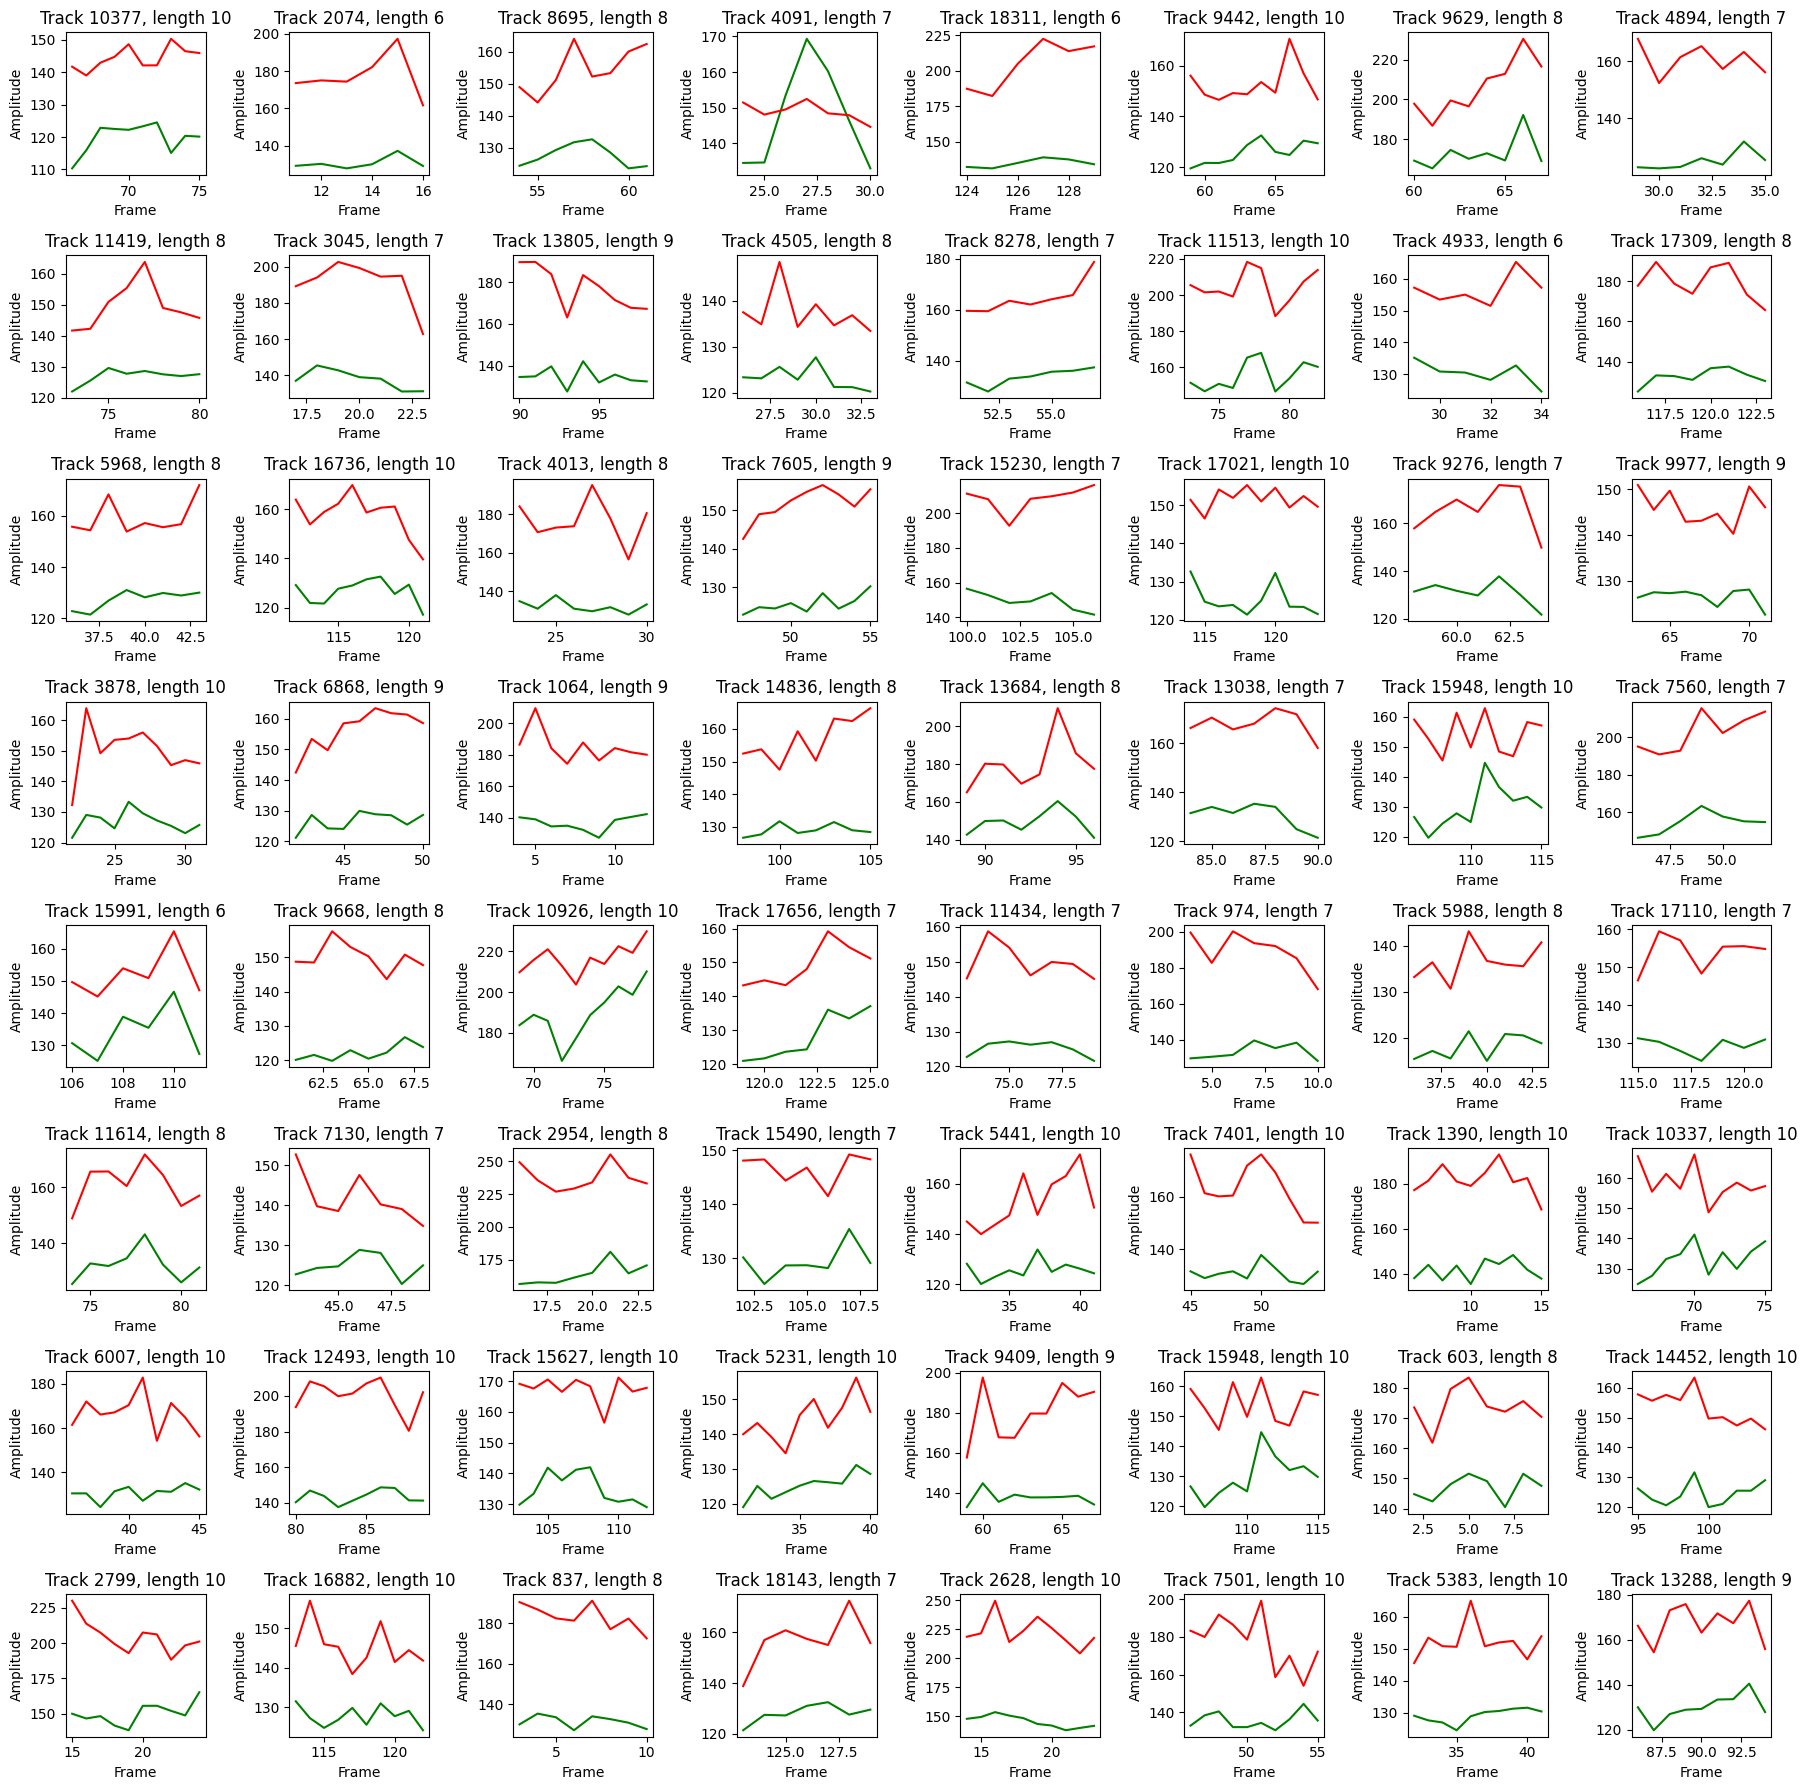

In [12]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 6 by 6 grid
num_rows = 8
num_cols = 8
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_amp'], label='c2_mean', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['c3_mean_amp'], label='c3_mean', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]}')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [13]:
selected_tracks = random_track_ids(filtered_tracks, desired_length = [11,15], num_to_select=64)

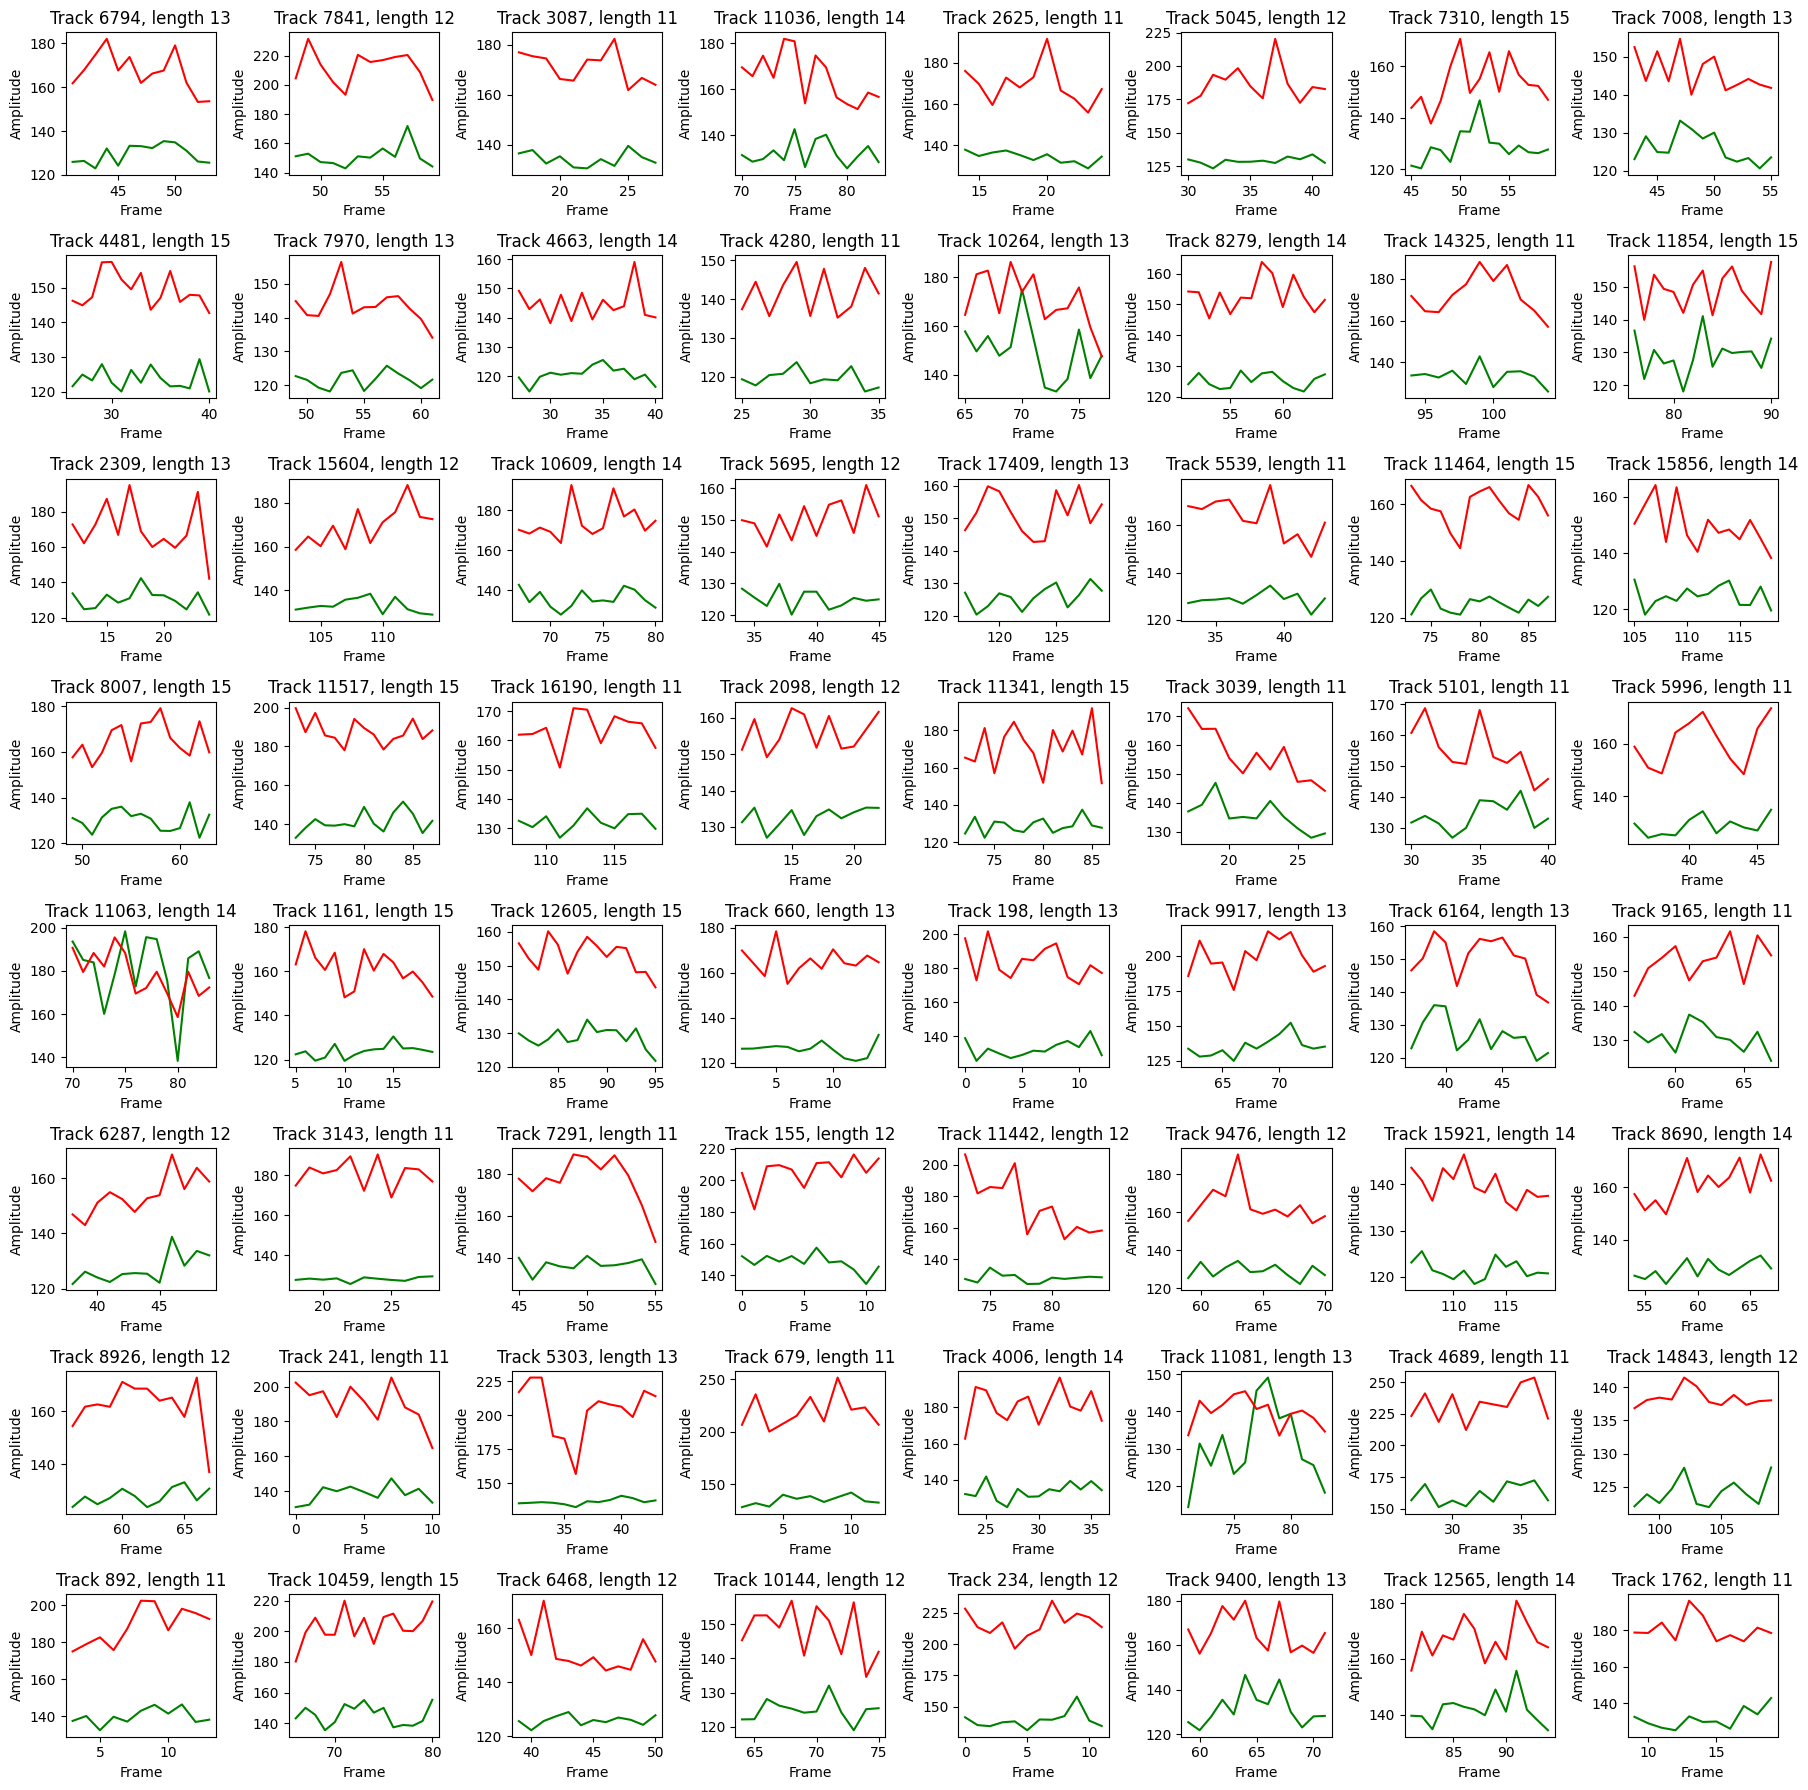

In [14]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 6 by 6 grid
num_rows = 8
num_cols = 8
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_amp'], label='c2_mean', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['c3_mean_amp'], label='c3_mean', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]}')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [15]:
selected_tracks = random_track_ids(filtered_tracks, desired_length = [16,25], num_to_select=64)

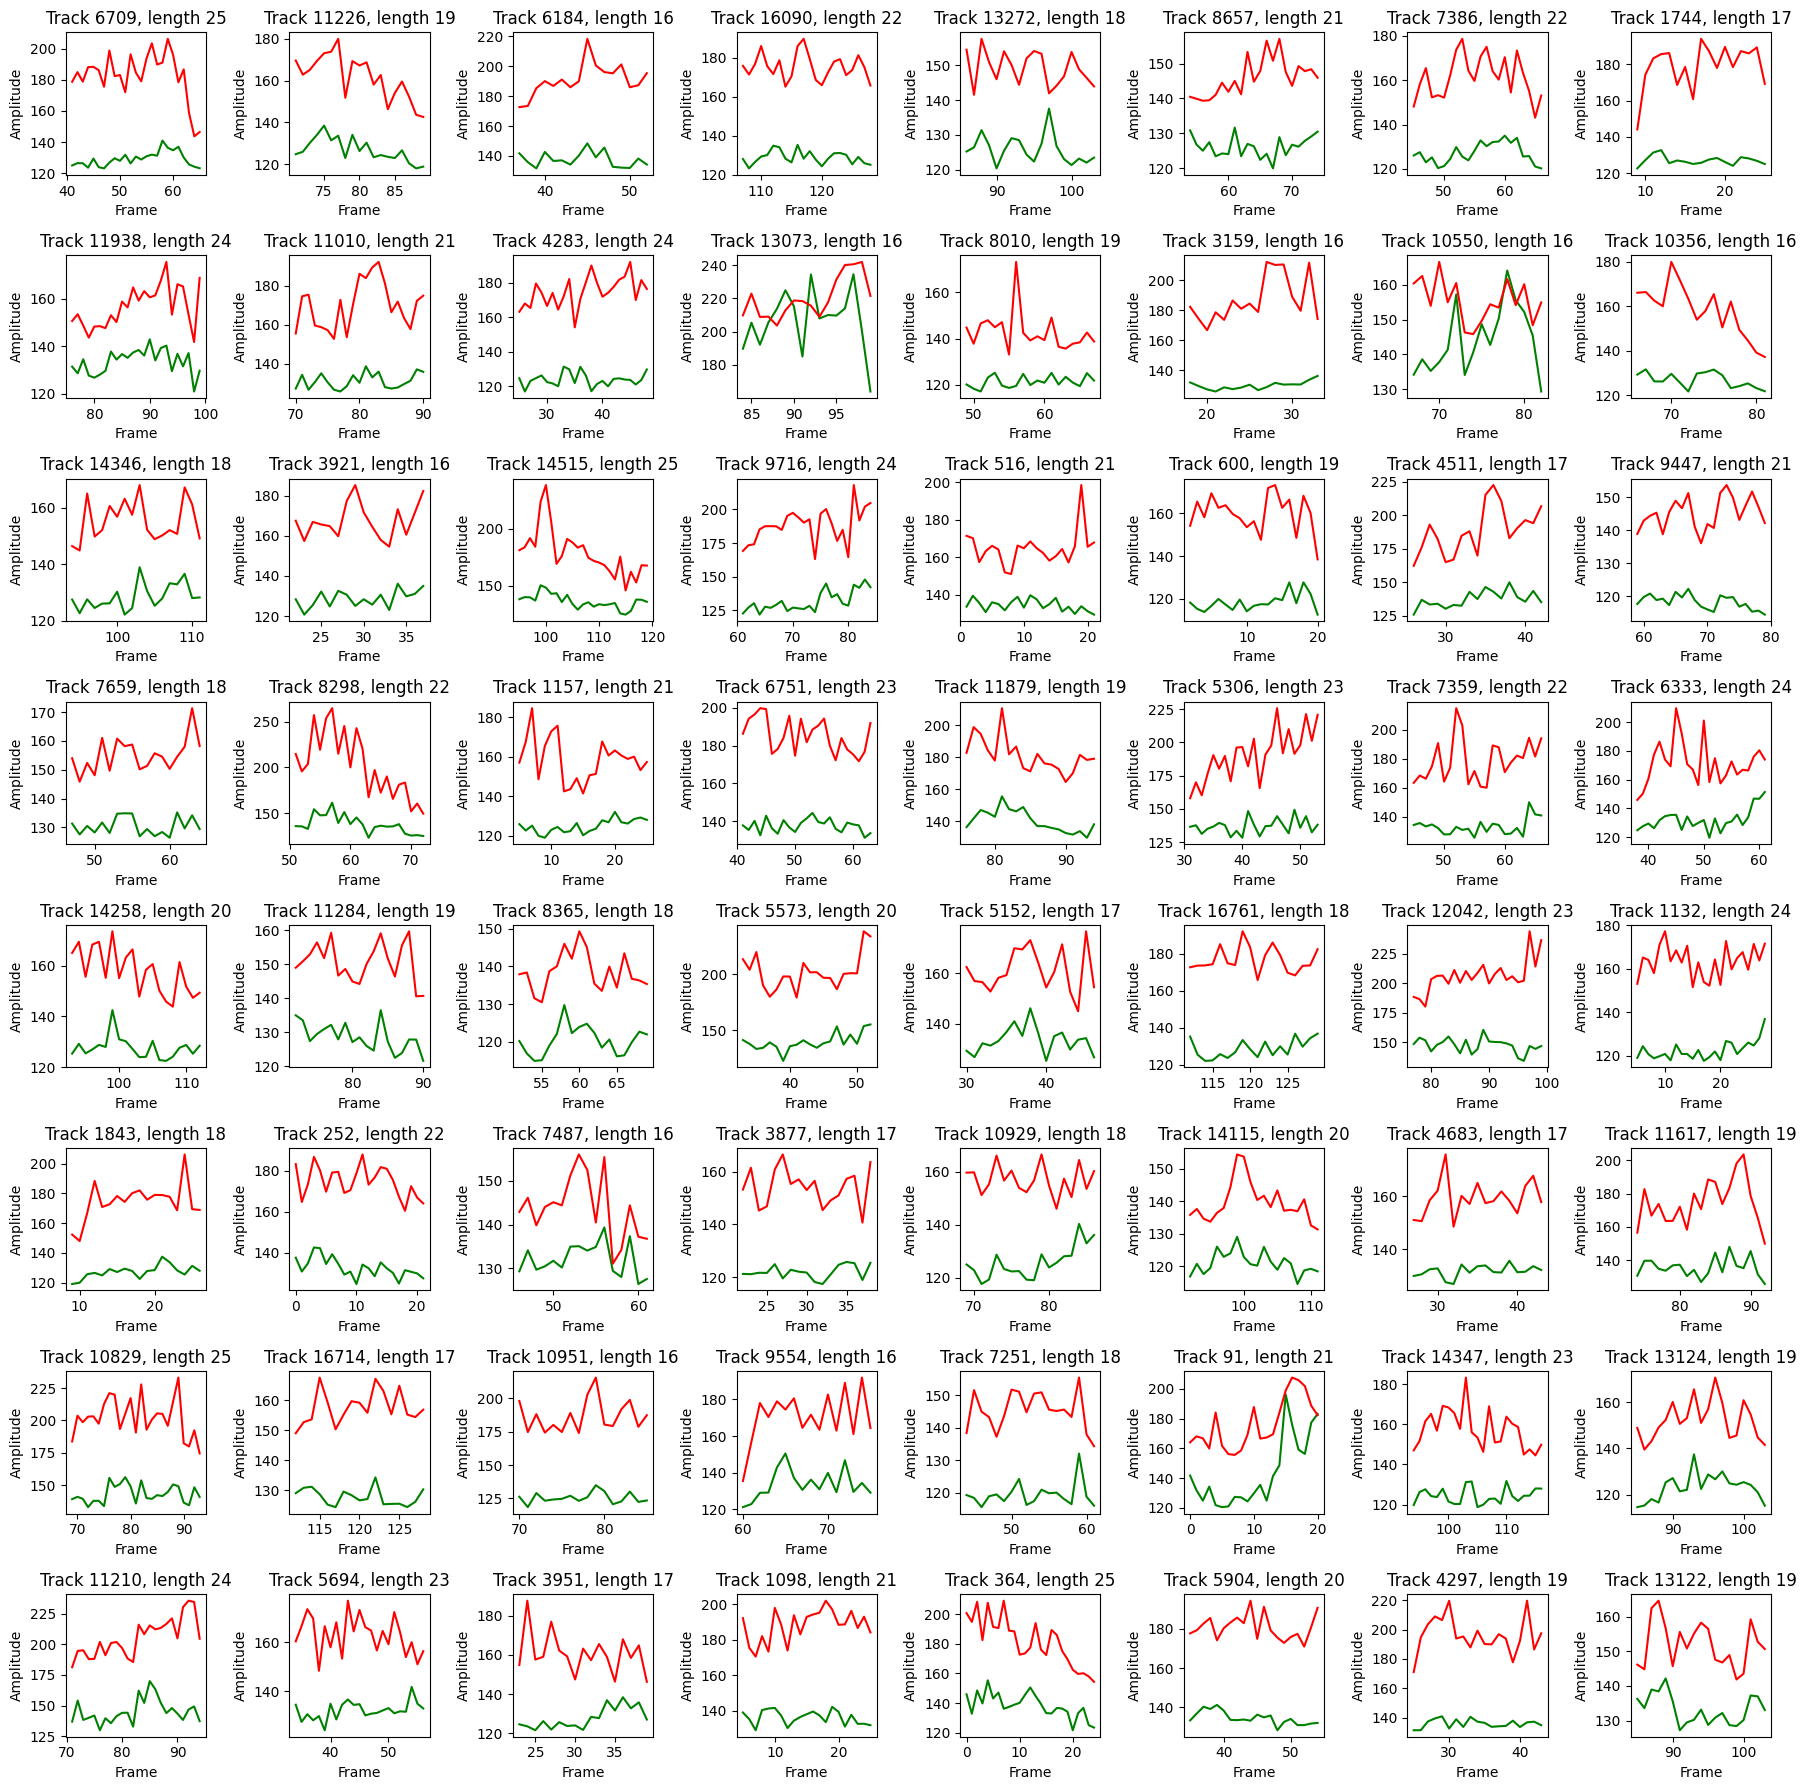

In [16]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 6 by 6 grid
num_rows = 8
num_cols = 8
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_amp'], label='c2_mean', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['c3_mean_amp'], label='c3_mean', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]}')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [25]:
def createBufferForLifetimeCohort(listOfTrackIdsAssignedToCohort,    backgroundIntensity ):


    trackIdArray = listOfTrackIdsAssignedToCohort
    
    m_buffer = []
    s_buffer = []
    
    bufferSize = 200
    bufferZero = 100

    
    m_buffer = np.full(( len(trackIdArray),bufferSize), backgroundIntensity,dtype=float)
    s_buffer = np.full(( len(trackIdArray),bufferSize), backgroundIntensity,dtype=float)
    
    '''
    #for i in range(0,bufferSize):
    #    m_buffer.append([])
    #    s_buffer.append([])
    '''
        
    counter = 0
    
    for trackId in trackIdArray:
        track = track_df[track_df['track_id'] == trackId]
        tracklength = filtered_tracks['track_length'].values[0]
        m_intensity = track['amplitude'].values.astype(float) #master (channel 3 in our case)
        s_intensity = track['c2_peak'].values.astype(float) #slave  (channel 2 in our case)
        maxIdx = np.argmax(s_intensity)
        print(f'Ids of max intensities are {maxIdx}')
        
    
        for i in range(0,len(track)):
            if(not np.isnan(m_intensity[i])):
                m_buffer[counter][bufferZero-maxIdx+i]=(m_intensity[i])
            if(not np.isnan(s_intensity[i])):
                s_buffer[counter][bufferZero-maxIdx+i]=(s_intensity[i])
           
                
        counter = counter+1;
    
    
    return (m_buffer,s_buffer)

In [18]:
master,slave = createBufferForLifetimeCohort(track_id_arrays[1],150)

In [19]:
master.shape

(106, 200)

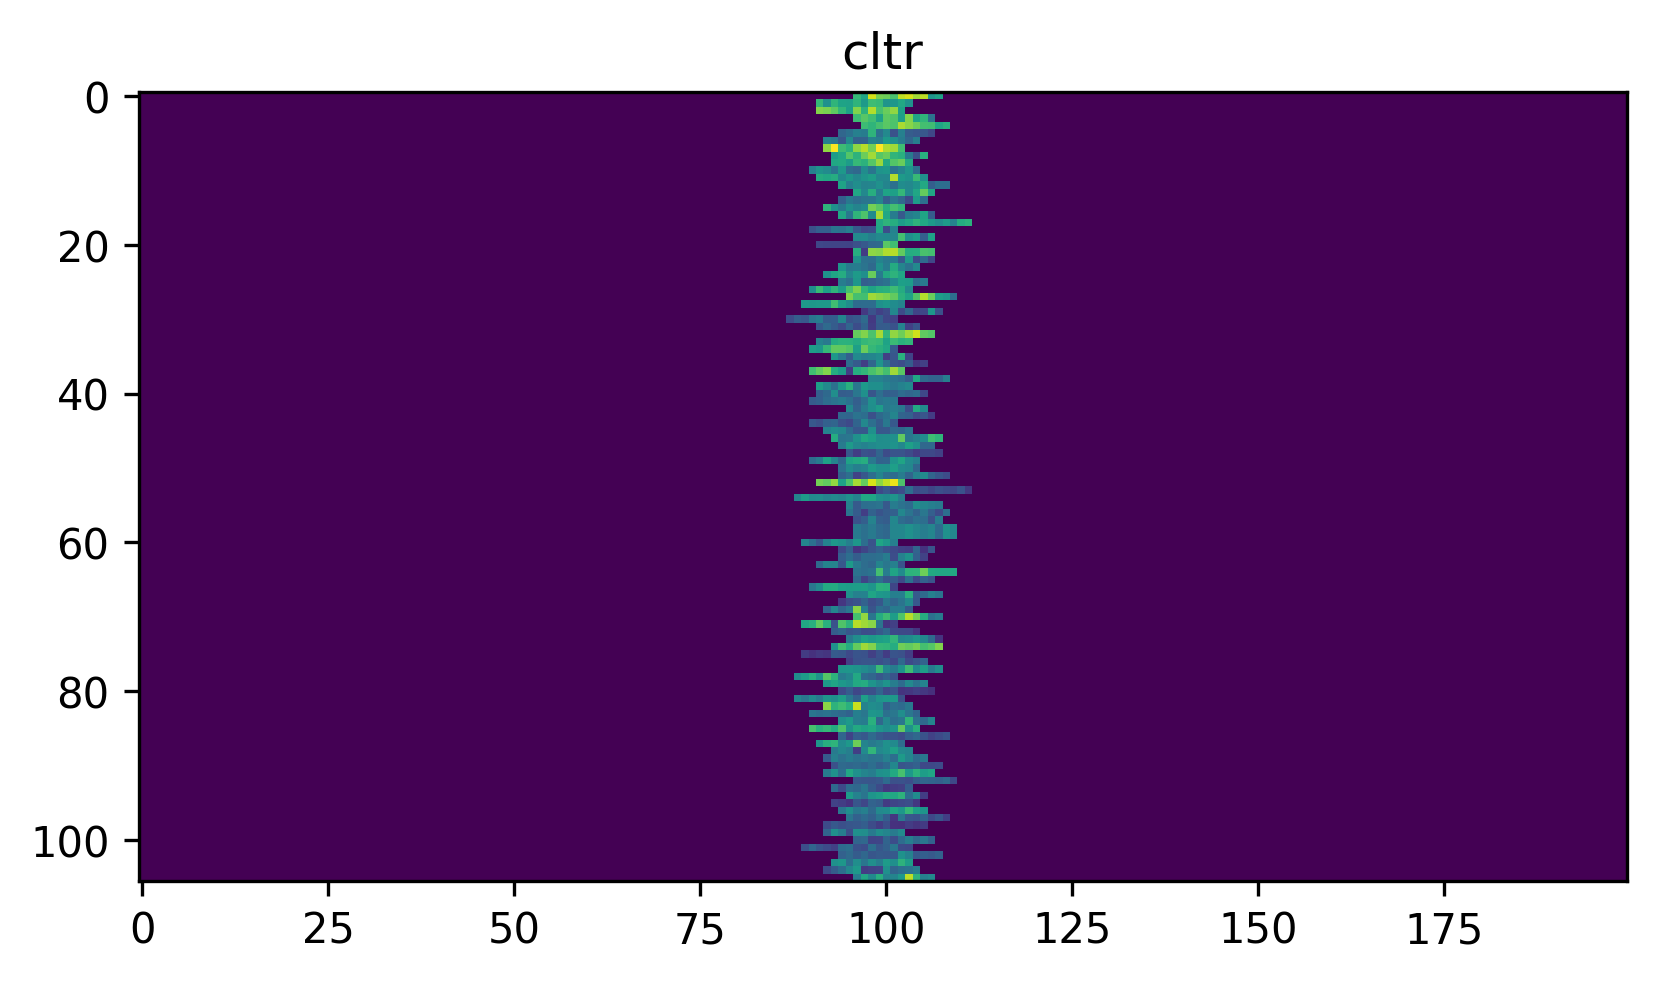

In [20]:
plt.figure(dpi=300)
plt.title('cltr')
plt.imshow(master)

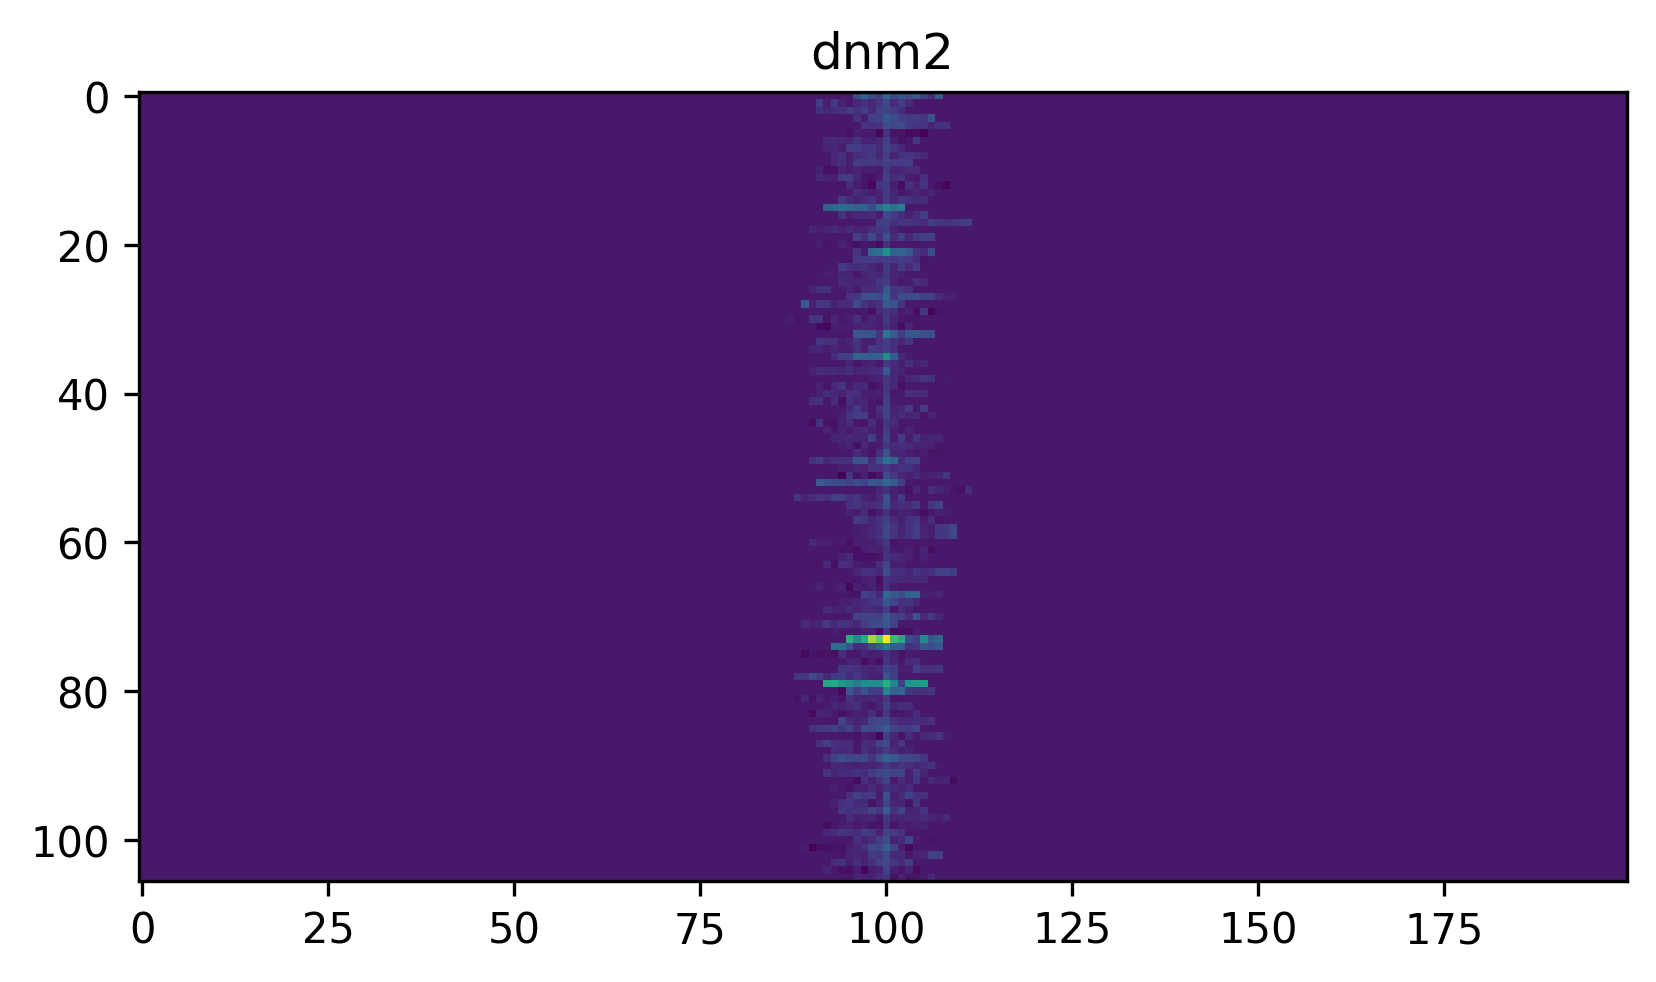

In [21]:
plt.figure(dpi=300)
plt.title('dnm2')
plt.imshow(slave)

In [56]:
def createBufferForLifetimeCohort_normalized(listOfTrackIdsAssignedToCohort,    backgroundIntensity ):


    trackIdArray = listOfTrackIdsAssignedToCohort
    
    m_buffer = []
    s_buffer = []
    
    bufferSize = 200 #default 200
    bufferZero = 100 #default 100

    
    m_buffer = np.full(( len(trackIdArray),bufferSize), backgroundIntensity,dtype=float)
    s_buffer = np.full(( len(trackIdArray),bufferSize), backgroundIntensity,dtype=float)
    
    
    #for i in range(0,bufferSize):
    #    m_buffer.append([])
    #    s_buffer.append([])
        
    counter = 0
    
    for trackId in trackIdArray:
        track = track_df[track_df['track_id'] == trackId]
        tracklength = filtered_tracks['track_length'].values[0]
        m_intensity = track['amplitude'].values.astype(float)
        s_intensity = track['c2_peak'].values.astype(float)
        maxIdx = np.argmax(s_intensity)
        m_maxIntensity = np.nanmax(m_intensity)
        s_maxIntensity = np.nanmax(s_intensity)
        
    
        for i in range(0,len(track)):
            if(not np.isnan(m_intensity[i])):
                m_buffer[counter][bufferZero-maxIdx+i]=(m_intensity[i])/m_maxIntensity
            if(not np.isnan(s_intensity[i])):
                valueToPut = (s_intensity[i])/s_maxIntensity
                #print(valueToPut)
                s_buffer[counter][bufferZero-maxIdx+i]=(s_intensity[i])/s_maxIntensity
                #print(s_buffer[counter])
                
        counter = counter+1;
    
    
    return (m_buffer,s_buffer)


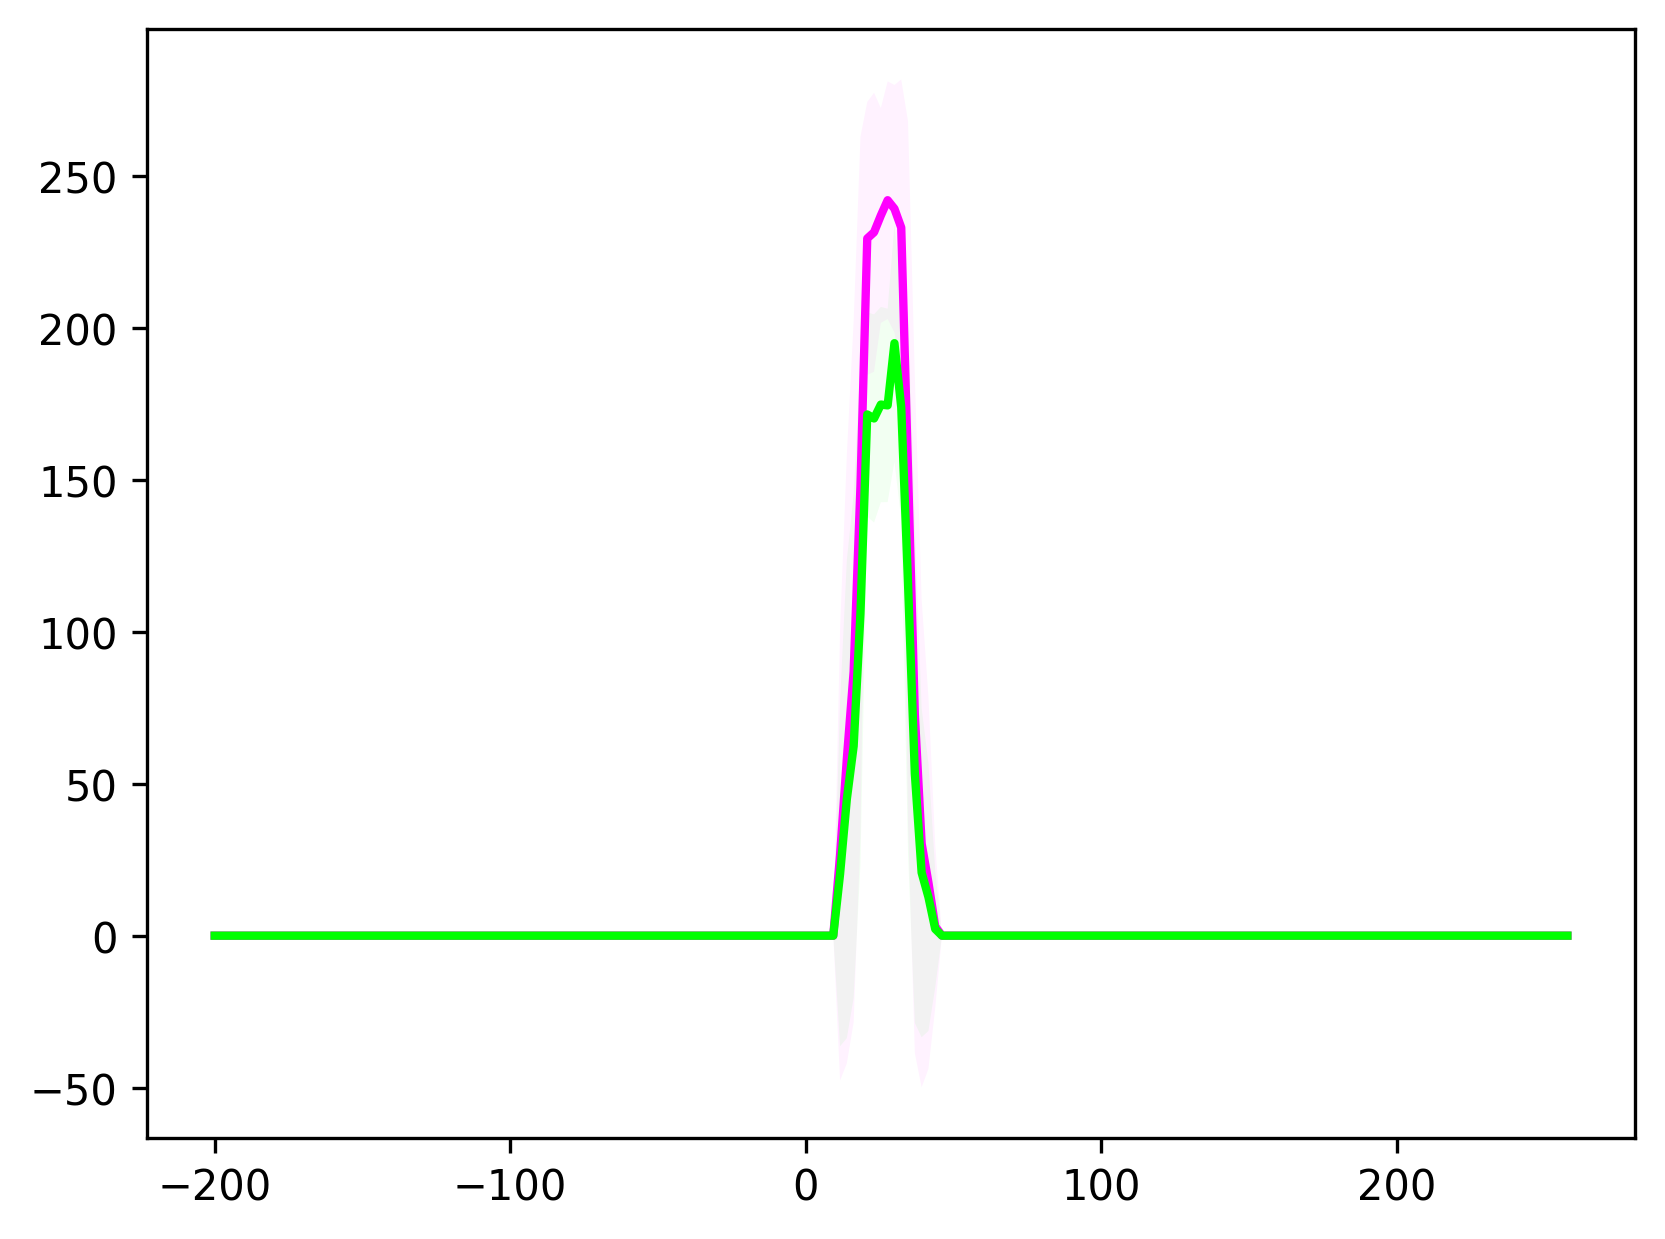

In [58]:
master, slave = createBufferForLifetimeCohort(track_id_arrays[0],0)

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2.3*1000
cohortIdx = 0
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
m_buffer = master 
s_buffer = slave 

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)

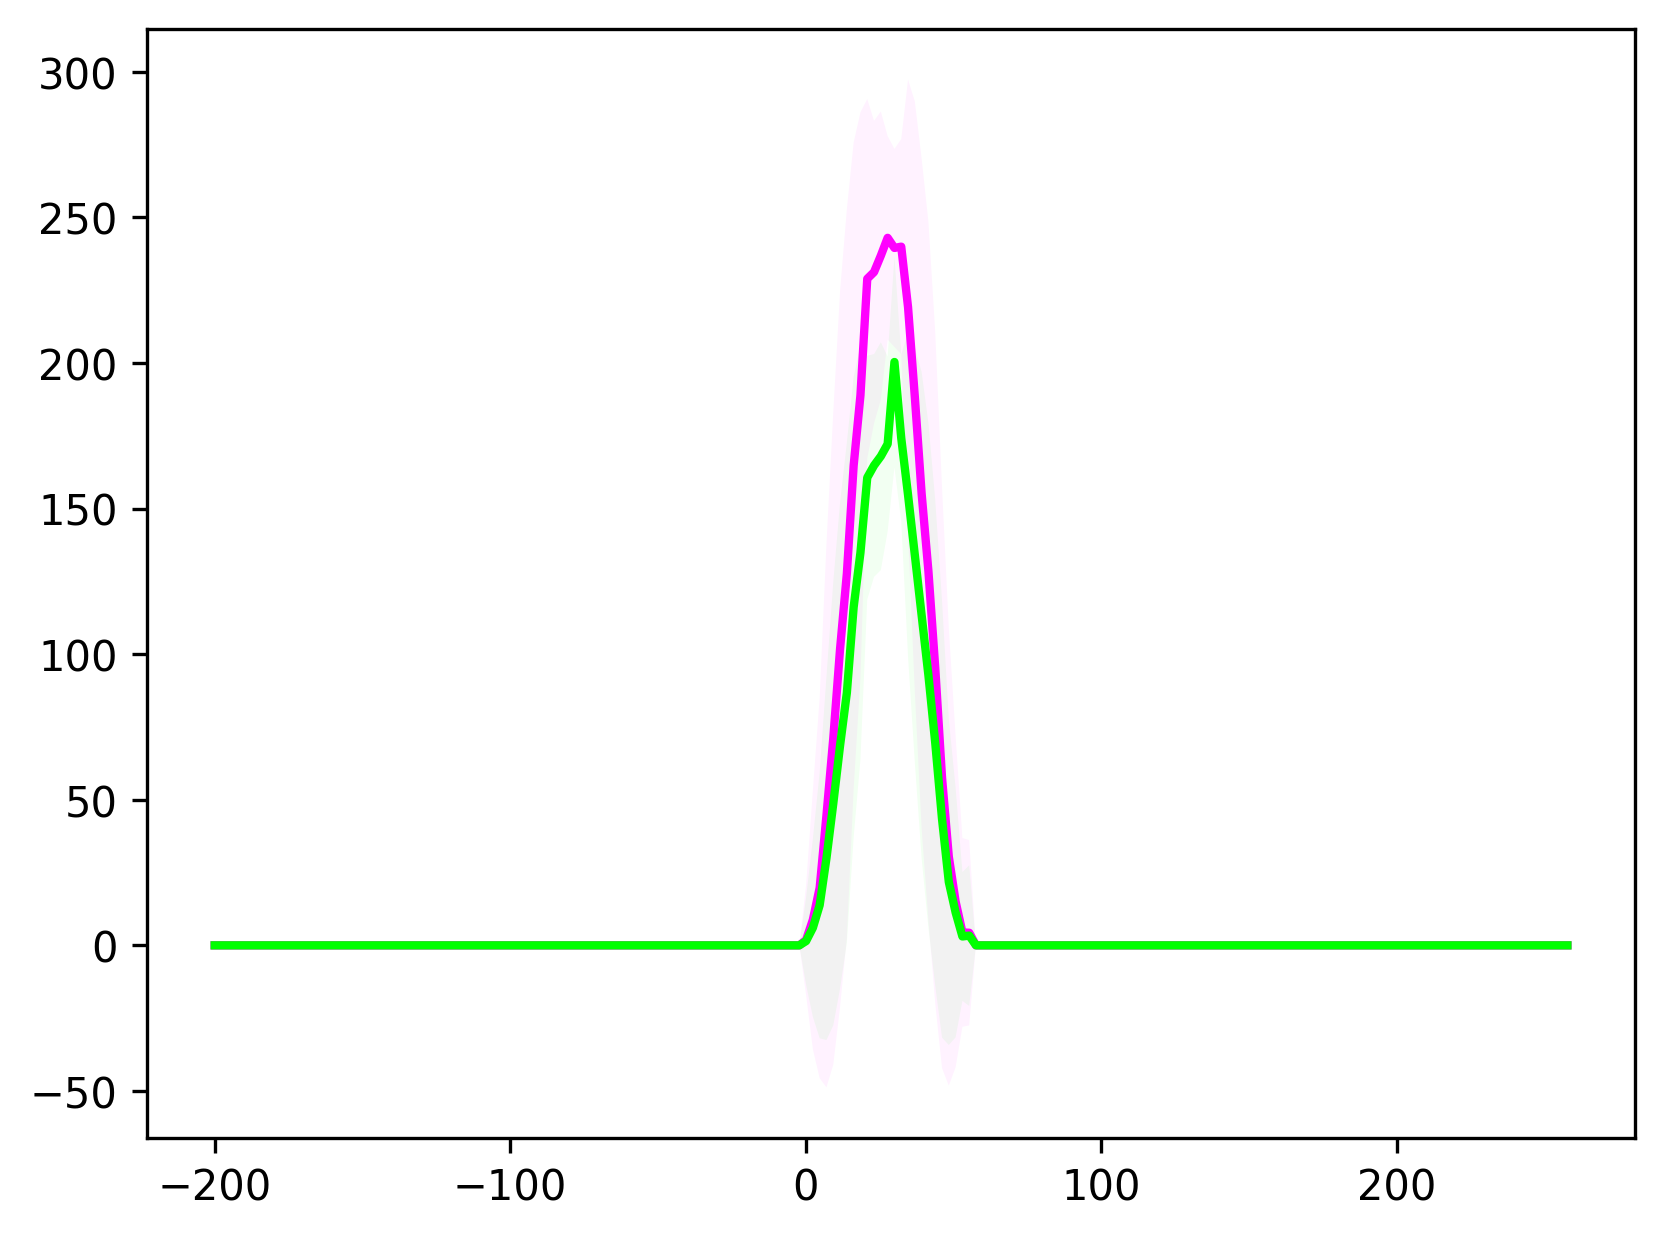

In [59]:
master, slave = createBufferForLifetimeCohort(track_id_arrays[1],0)

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2300
cohortIdx = 0
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
m_buffer = master 
s_buffer = slave 

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)

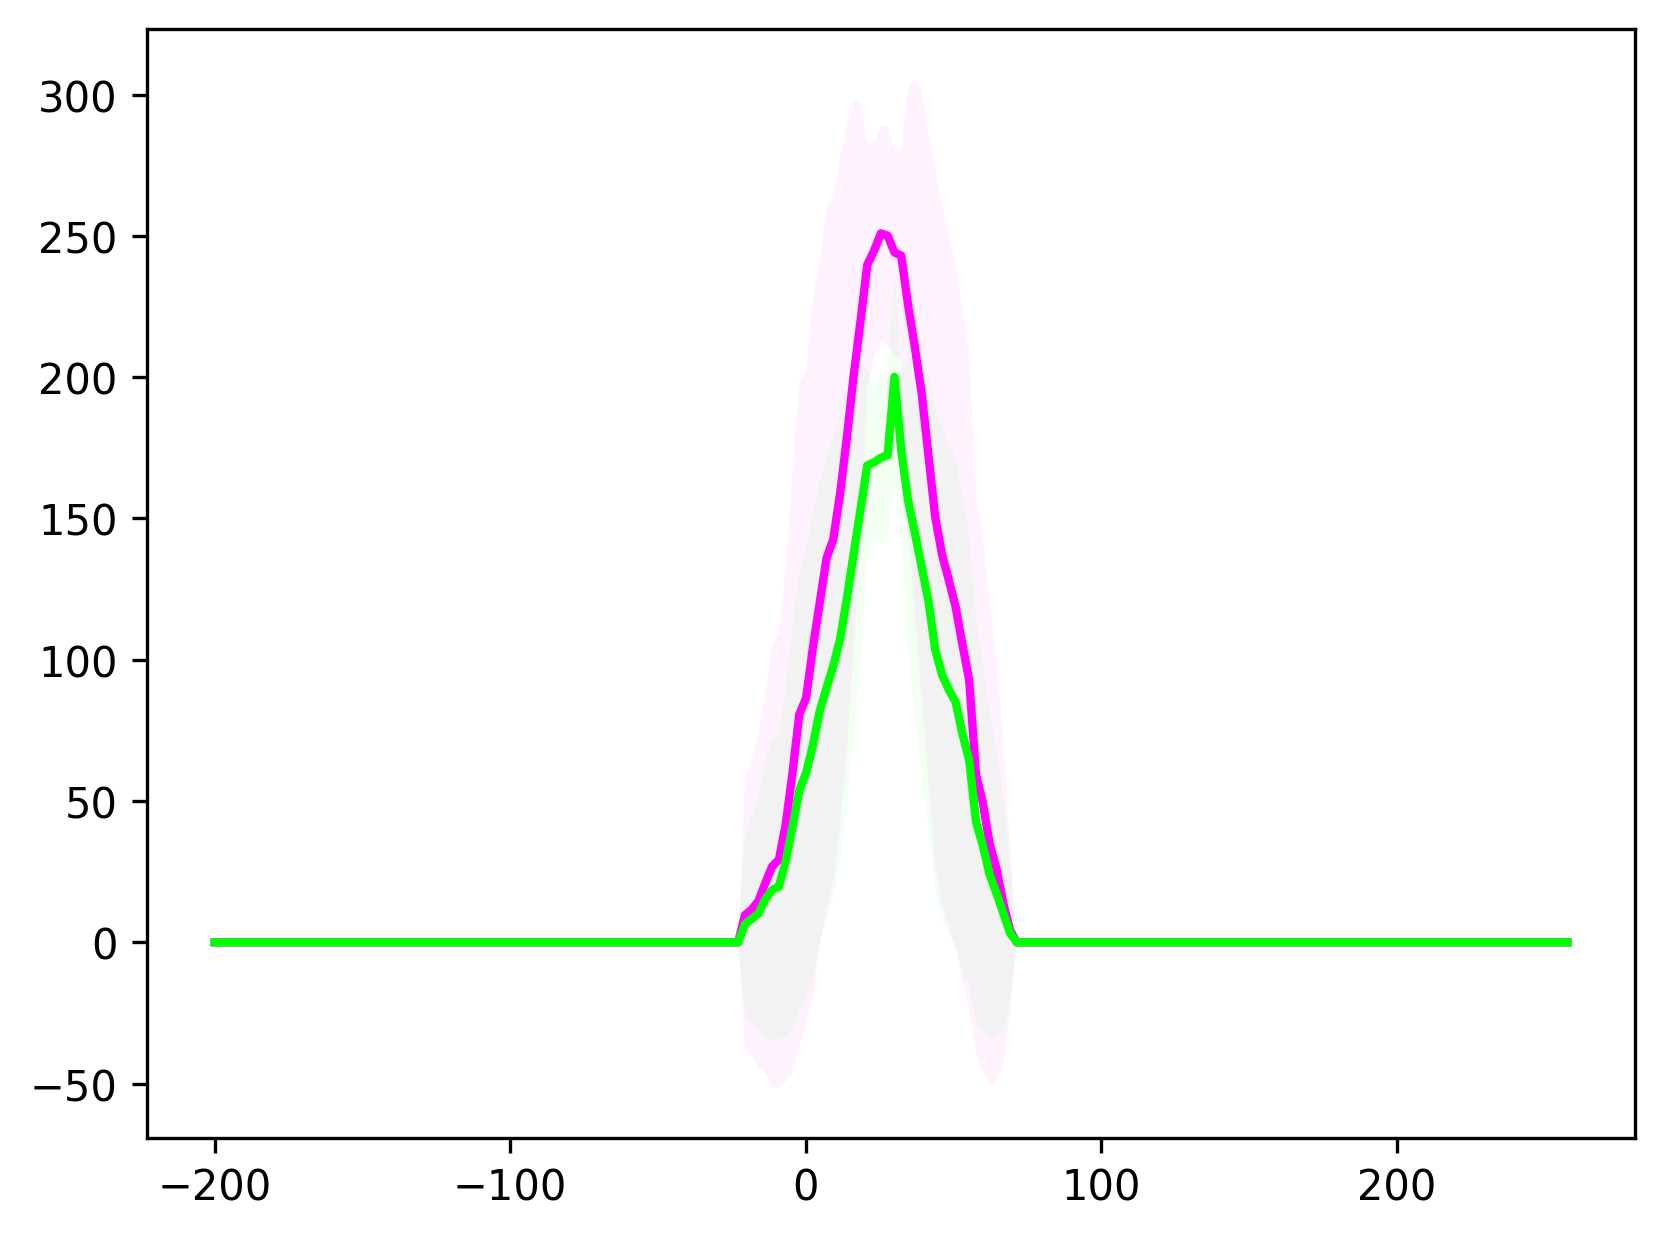

In [61]:
master, slave = createBufferForLifetimeCohort(track_id_arrays[2],0)

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2300
cohortIdx = 0
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
m_buffer = master 
s_buffer = slave 

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)

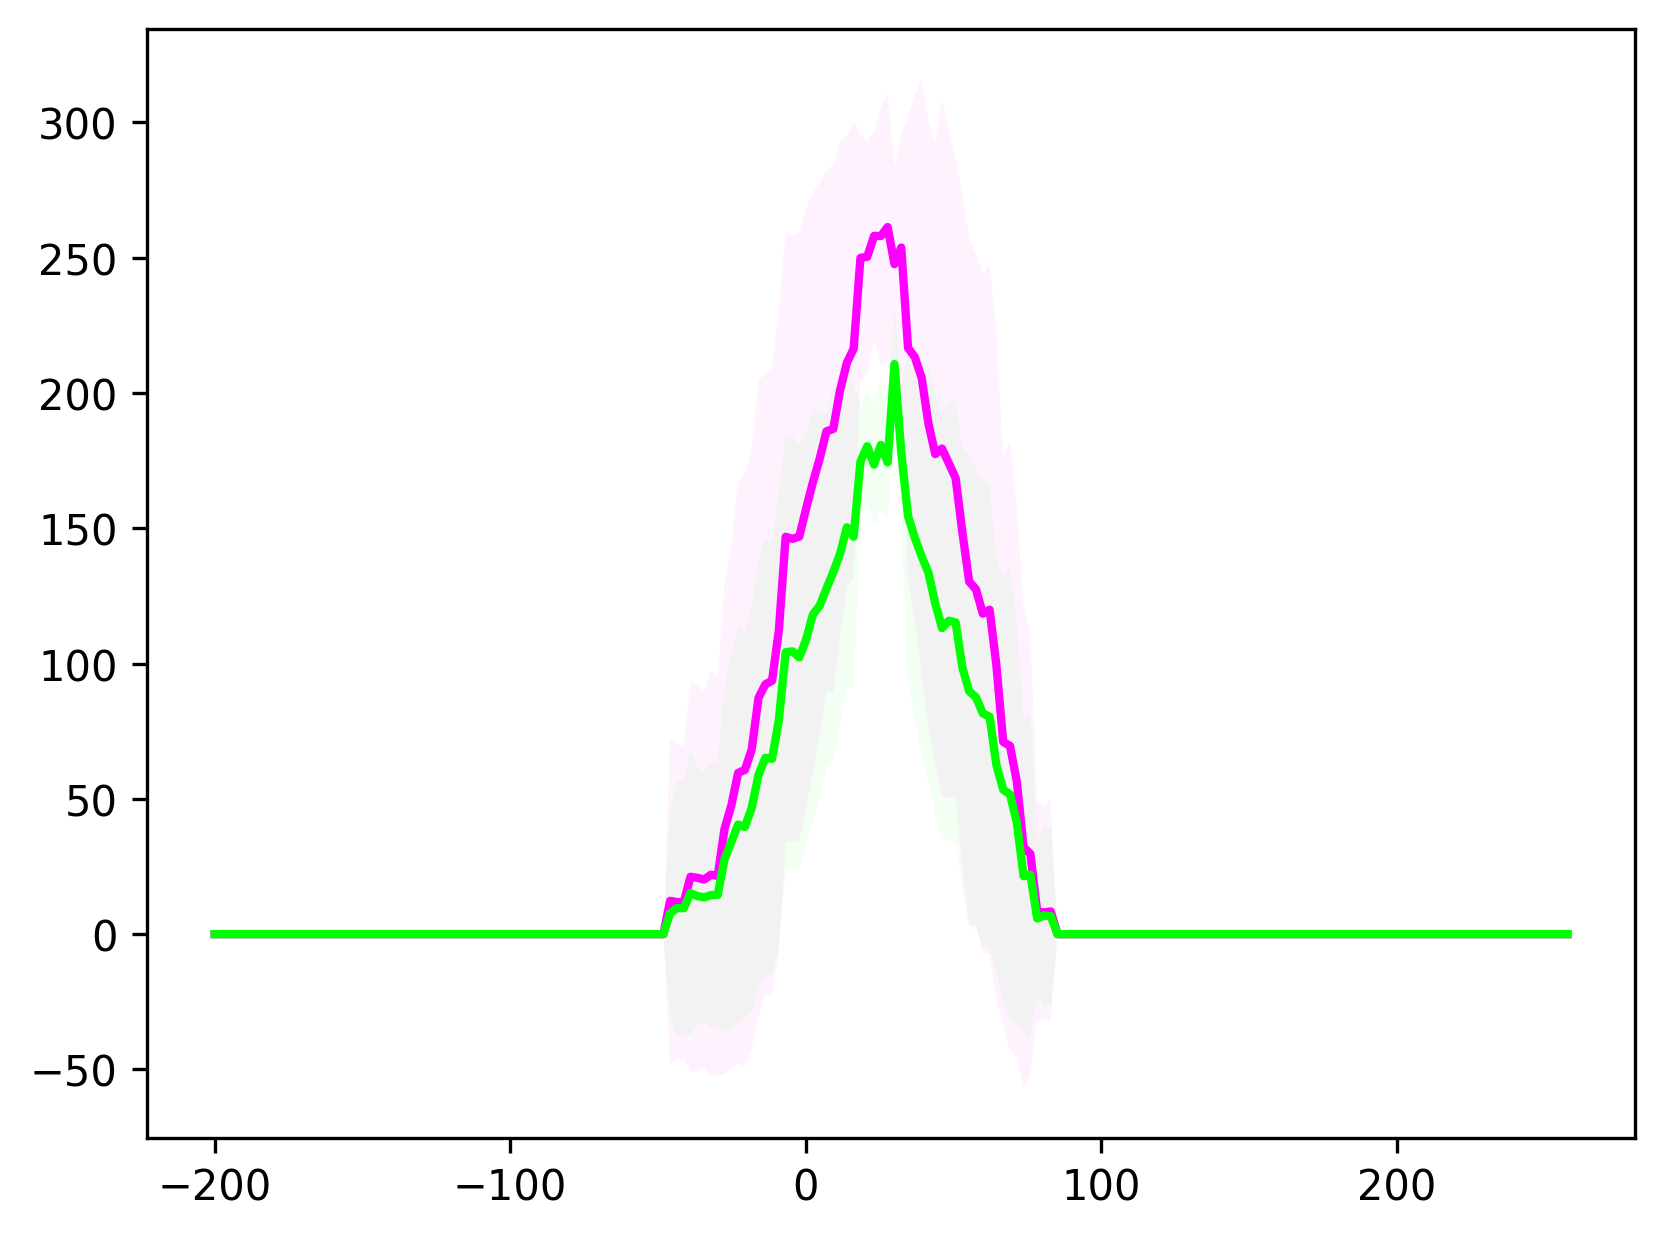

In [62]:
master, slave = createBufferForLifetimeCohort(track_id_arrays[3],0)

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2300
cohortIdx = 0
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
m_buffer = master 
s_buffer = slave 

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)

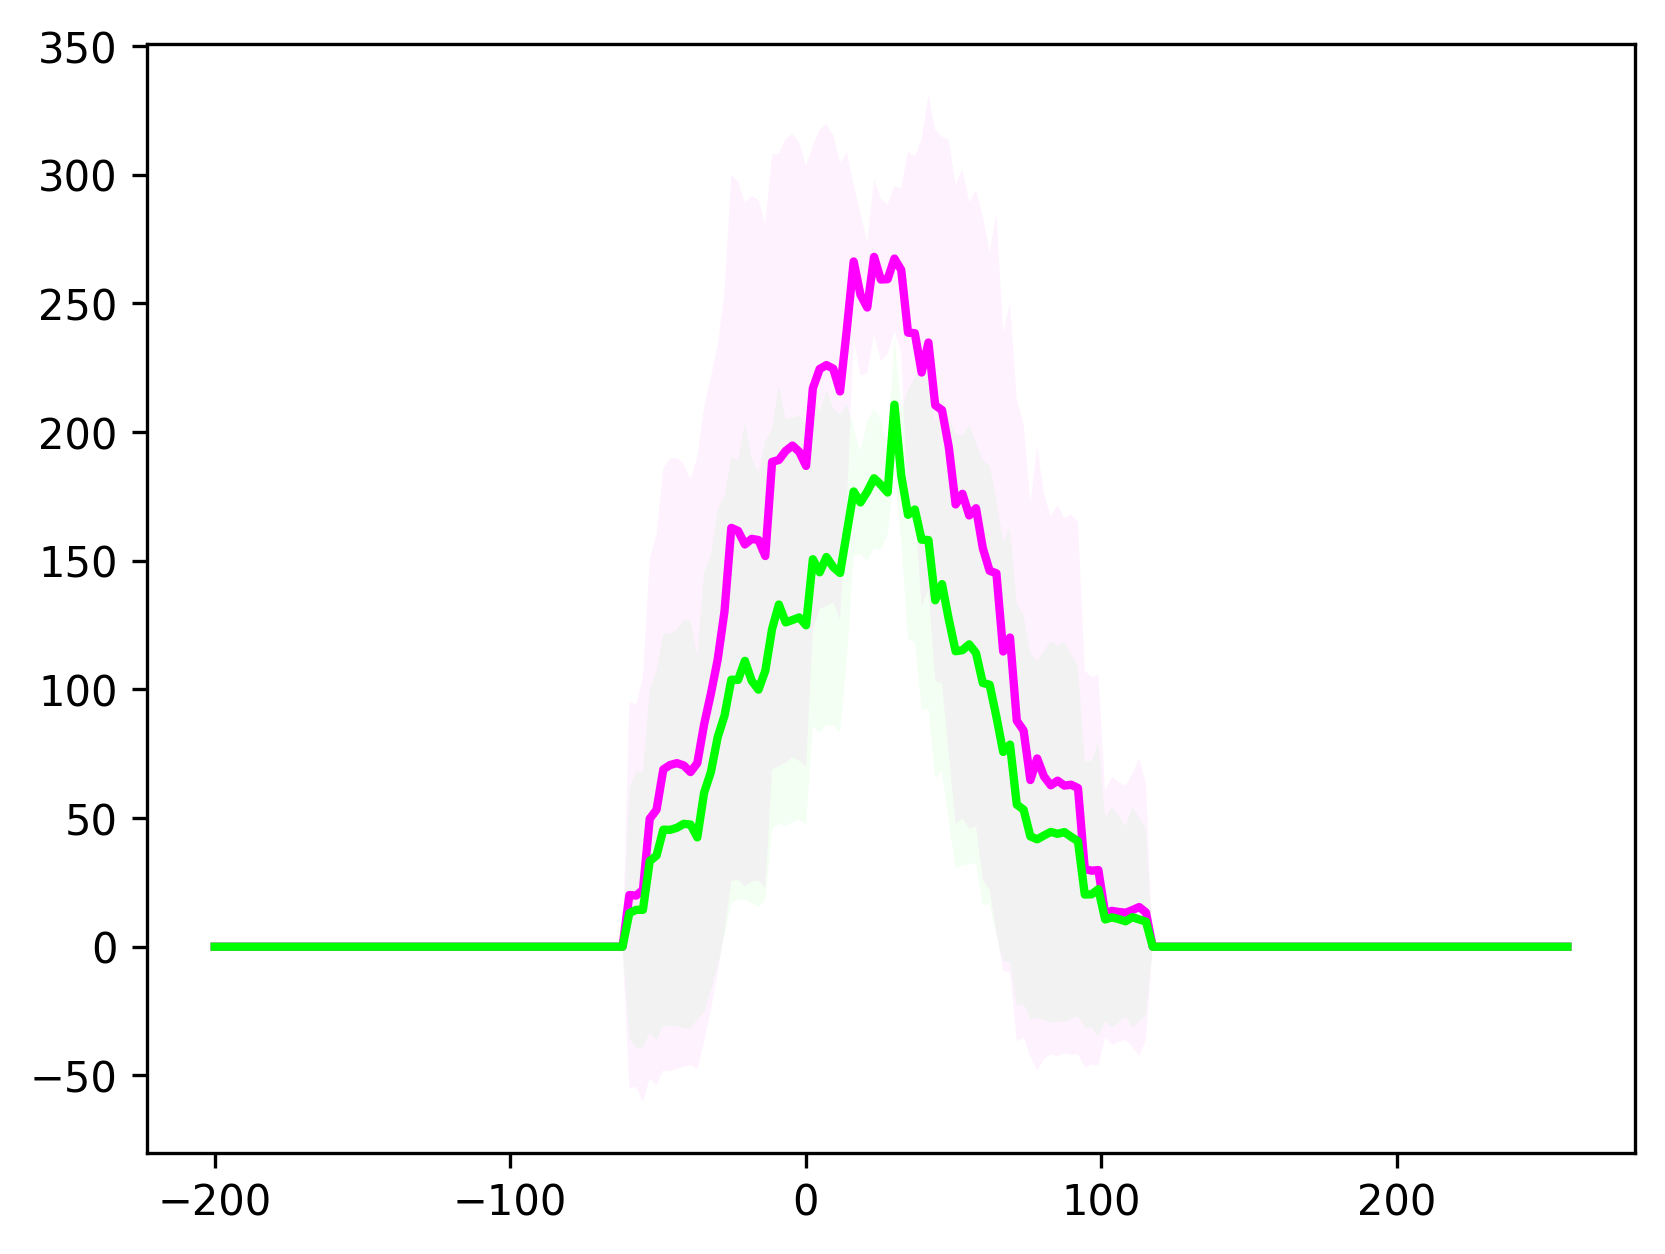

In [63]:
master, slave = createBufferForLifetimeCohort(track_id_arrays[4],0)

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2300
cohortIdx = 0
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
m_buffer = master 
s_buffer = slave 

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)

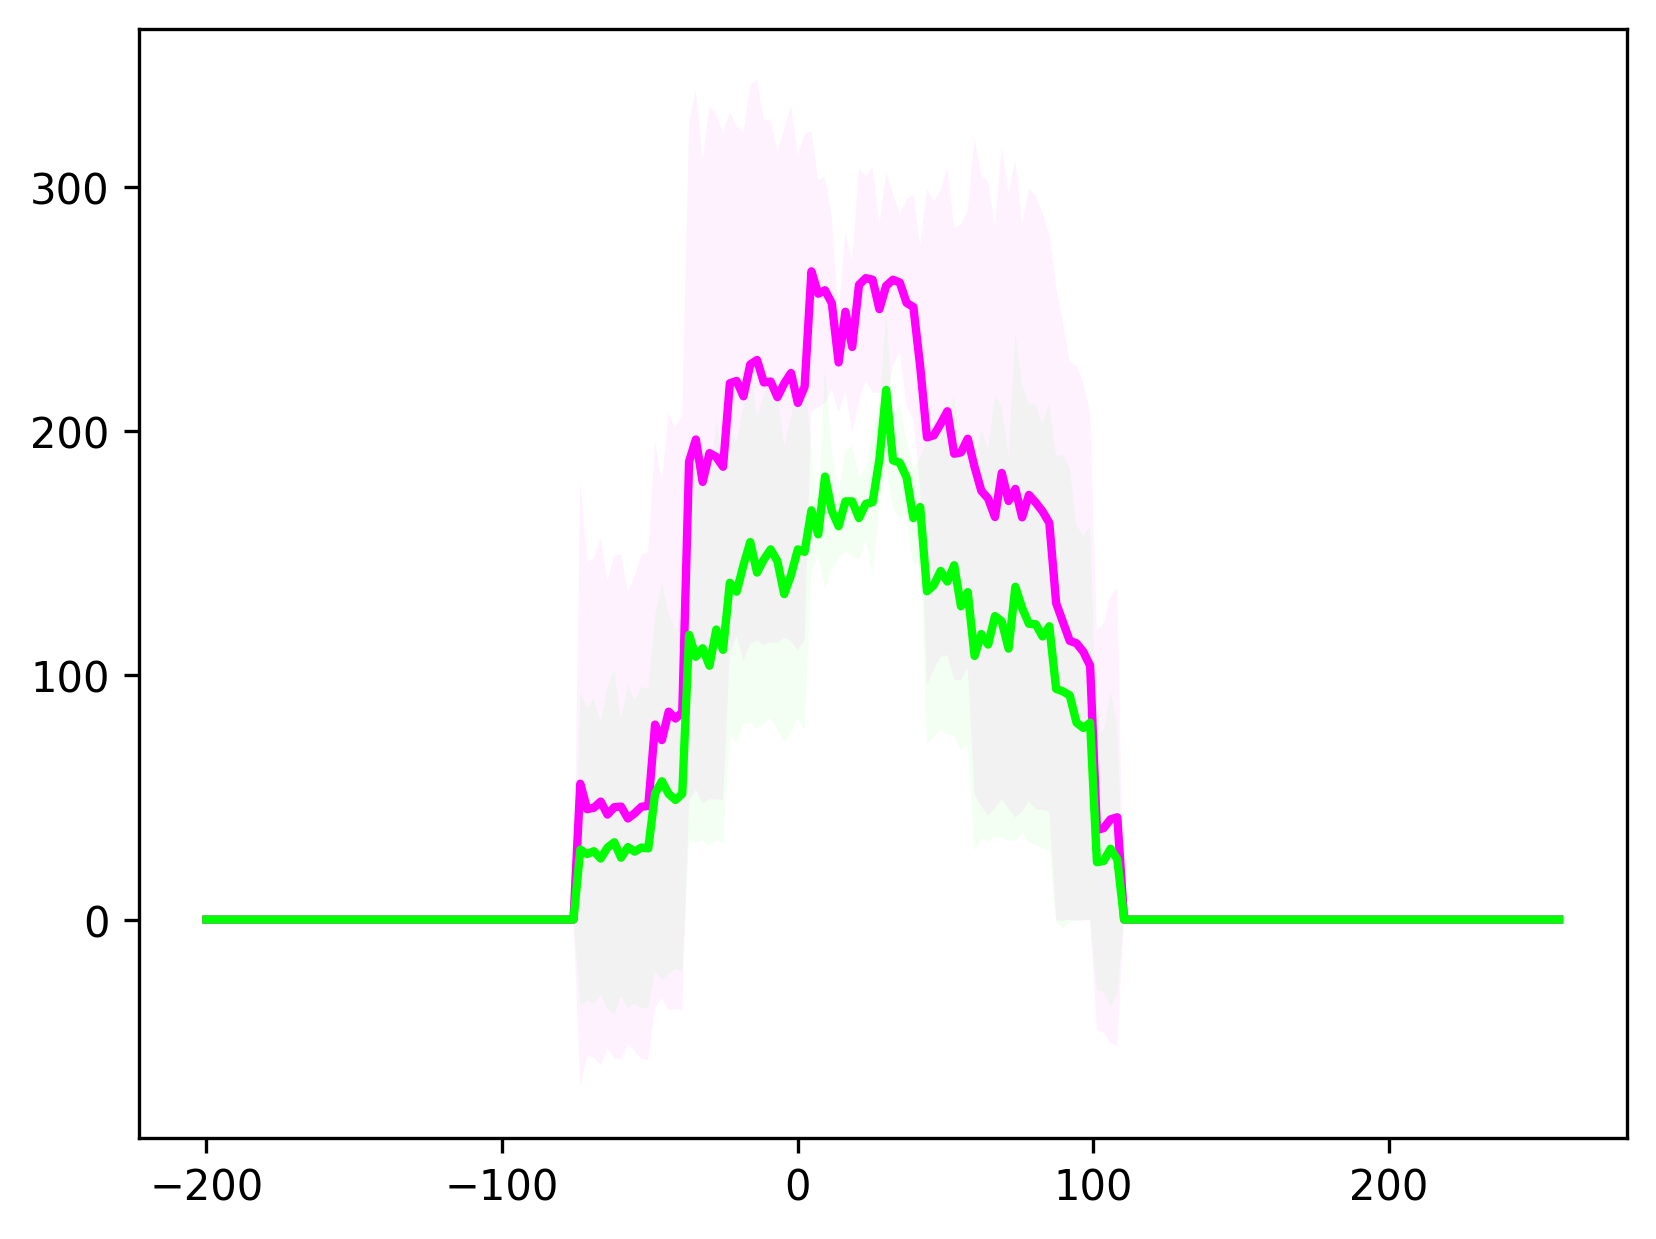

In [64]:
master, slave = createBufferForLifetimeCohort(track_id_arrays[5],0)

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2300
cohortIdx = 0
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
m_buffer = master 
s_buffer = slave 

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)

# Normalised Plots

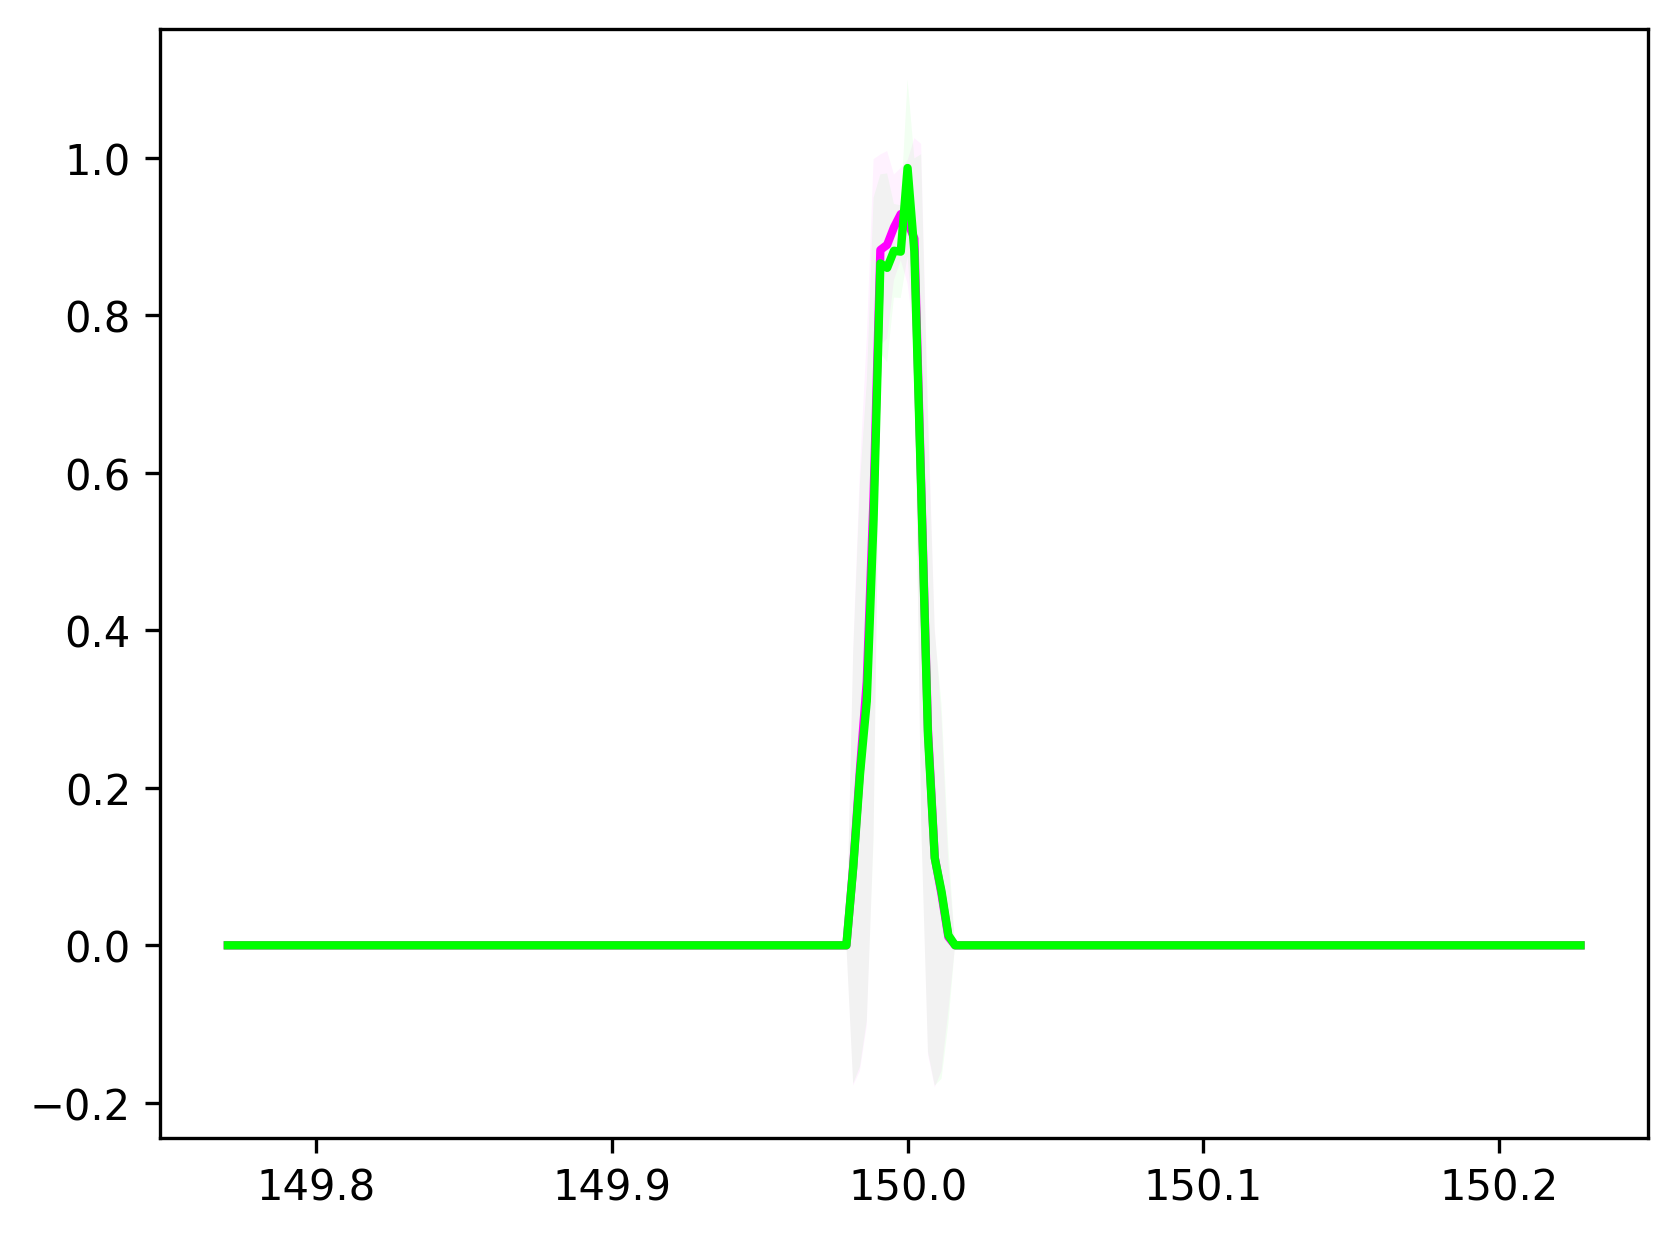

In [39]:
master, slave = createBufferForLifetimeCohort_normalized(track_id_arrays[0],0)

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2.3
cohortIdx = 3
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
m_buffer = master 
s_buffer = slave 

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)

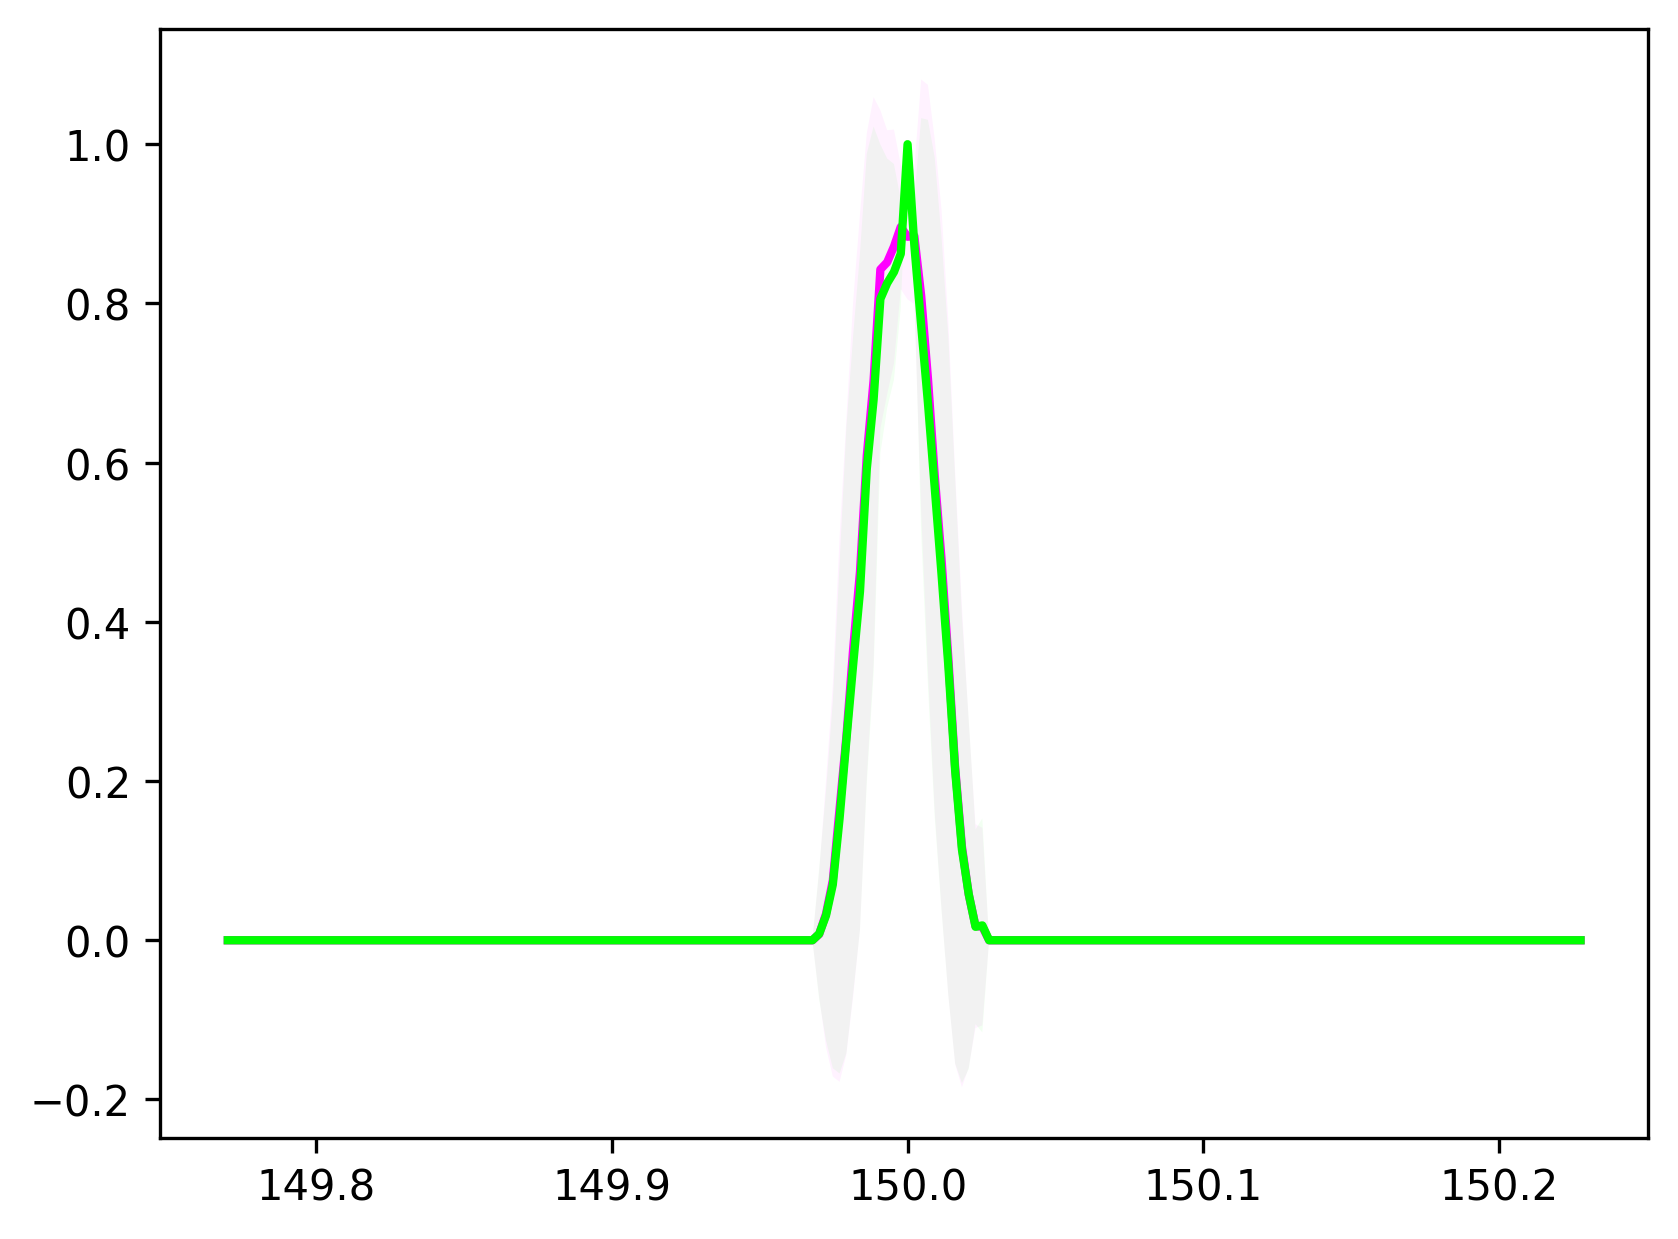

In [41]:
master, slave = createBufferForLifetimeCohort_normalized(track_id_arrays[1],0)

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2.3
cohortIdx = 3
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
m_buffer = master 
s_buffer = slave 

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)

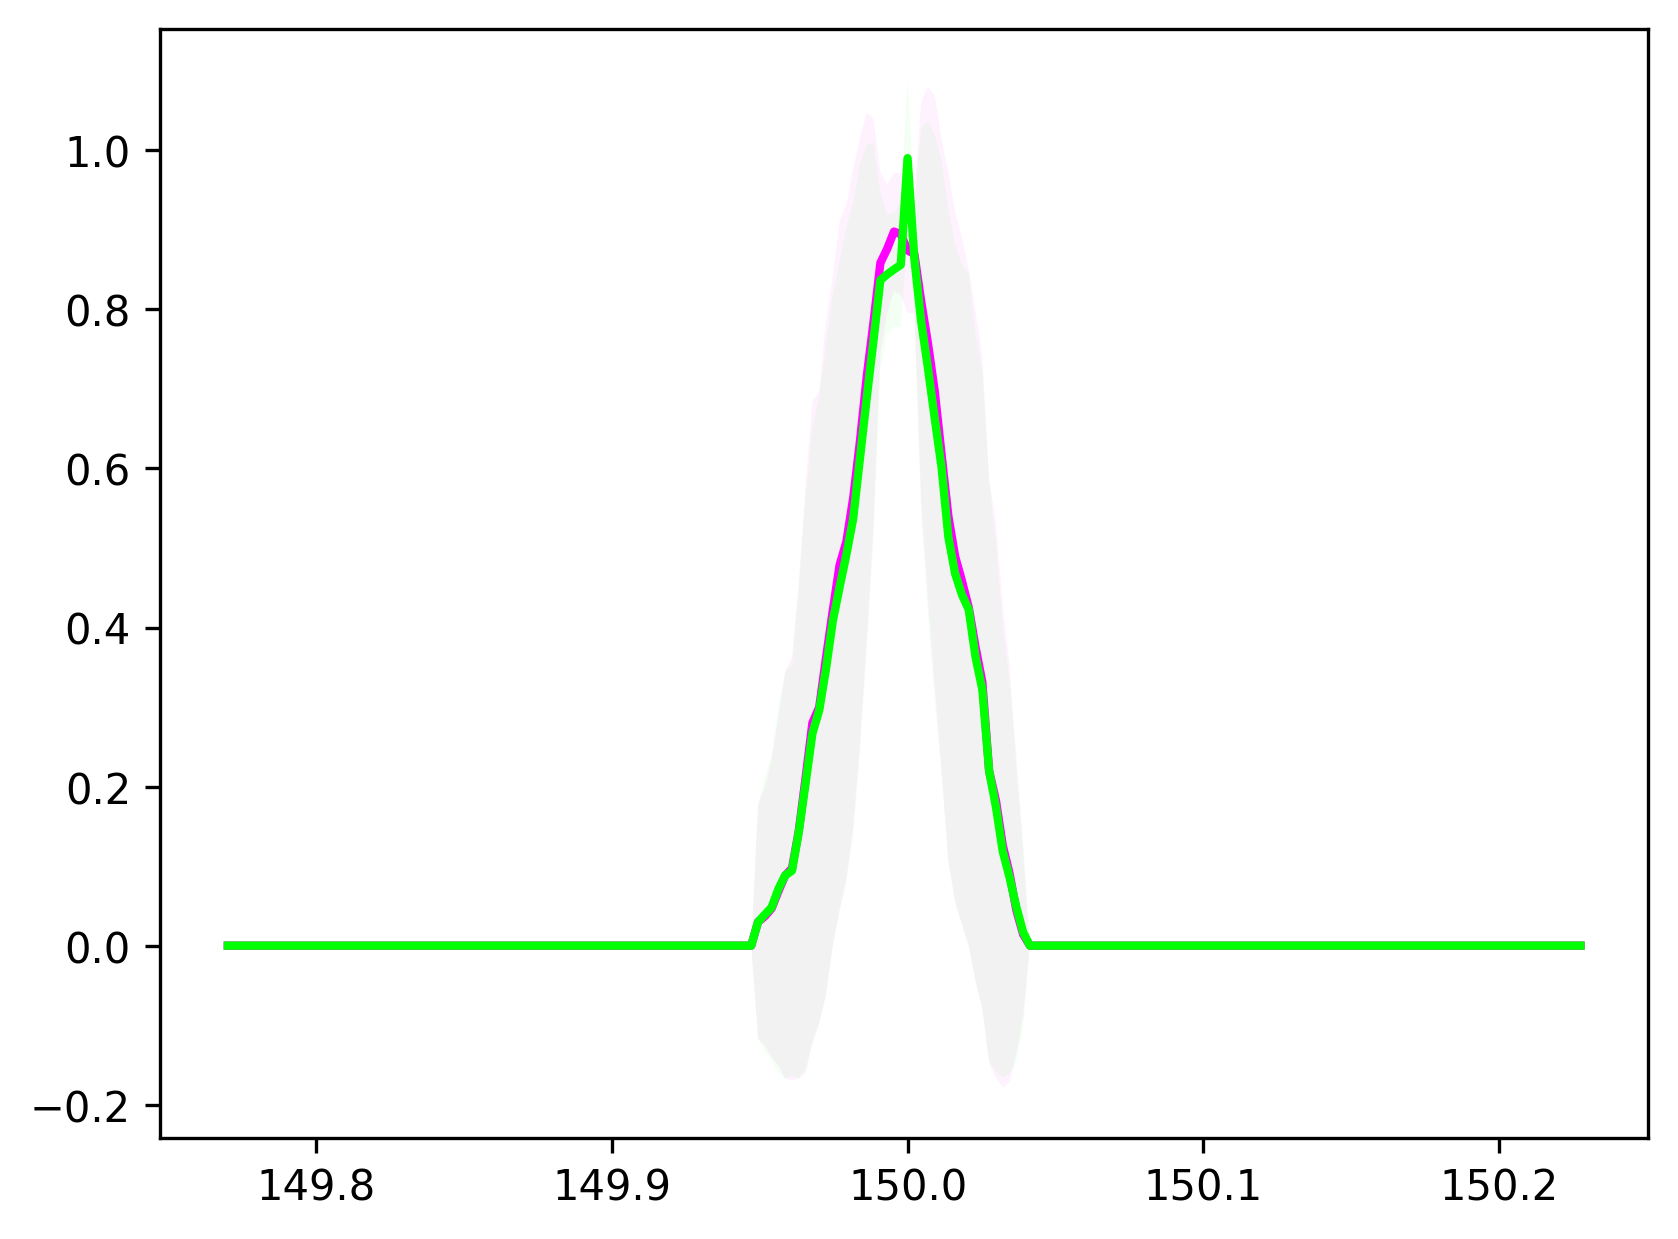

In [42]:
master, slave = createBufferForLifetimeCohort_normalized(track_id_arrays[2],0)

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2.3
cohortIdx = 3
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
m_buffer = master 
s_buffer = slave 

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)

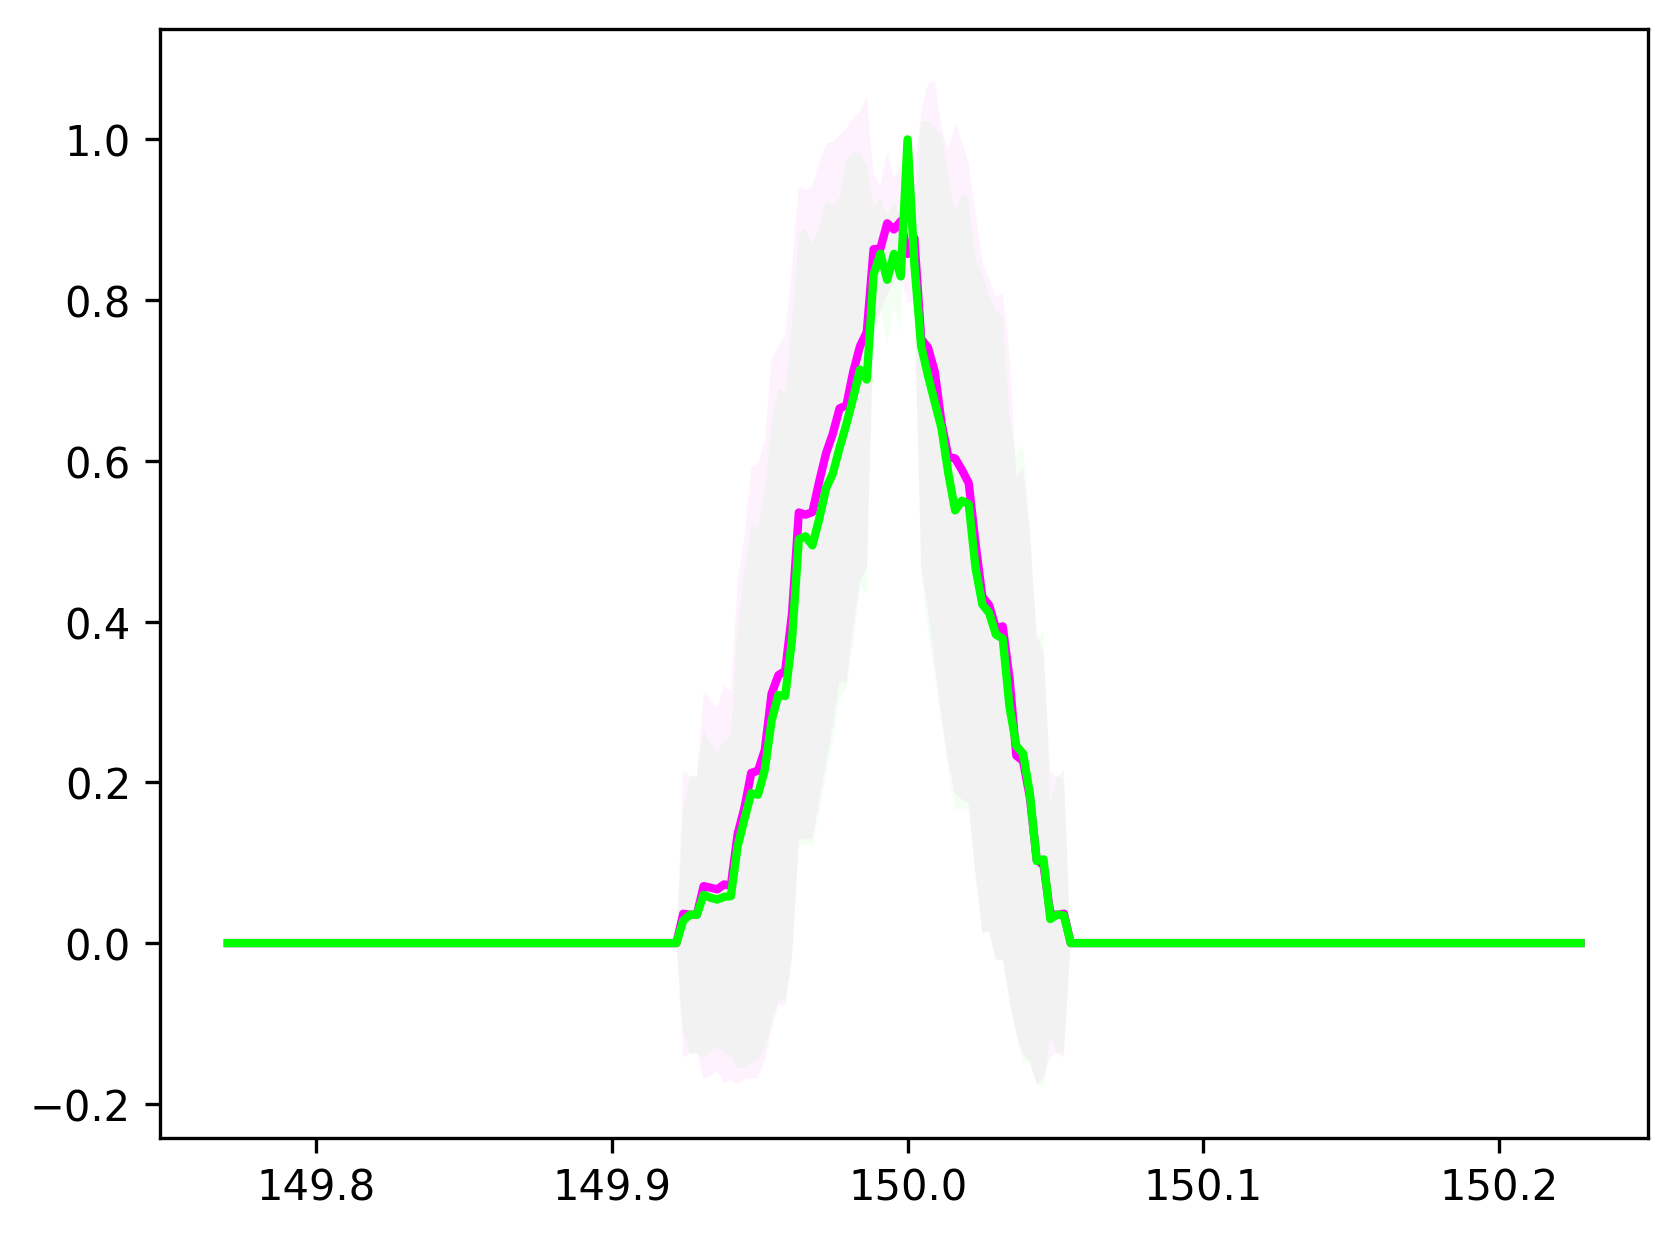

In [43]:
master, slave = createBufferForLifetimeCohort_normalized(track_id_arrays[3],0)

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2.3
cohortIdx = 3
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
m_buffer = master 
s_buffer = slave 

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)

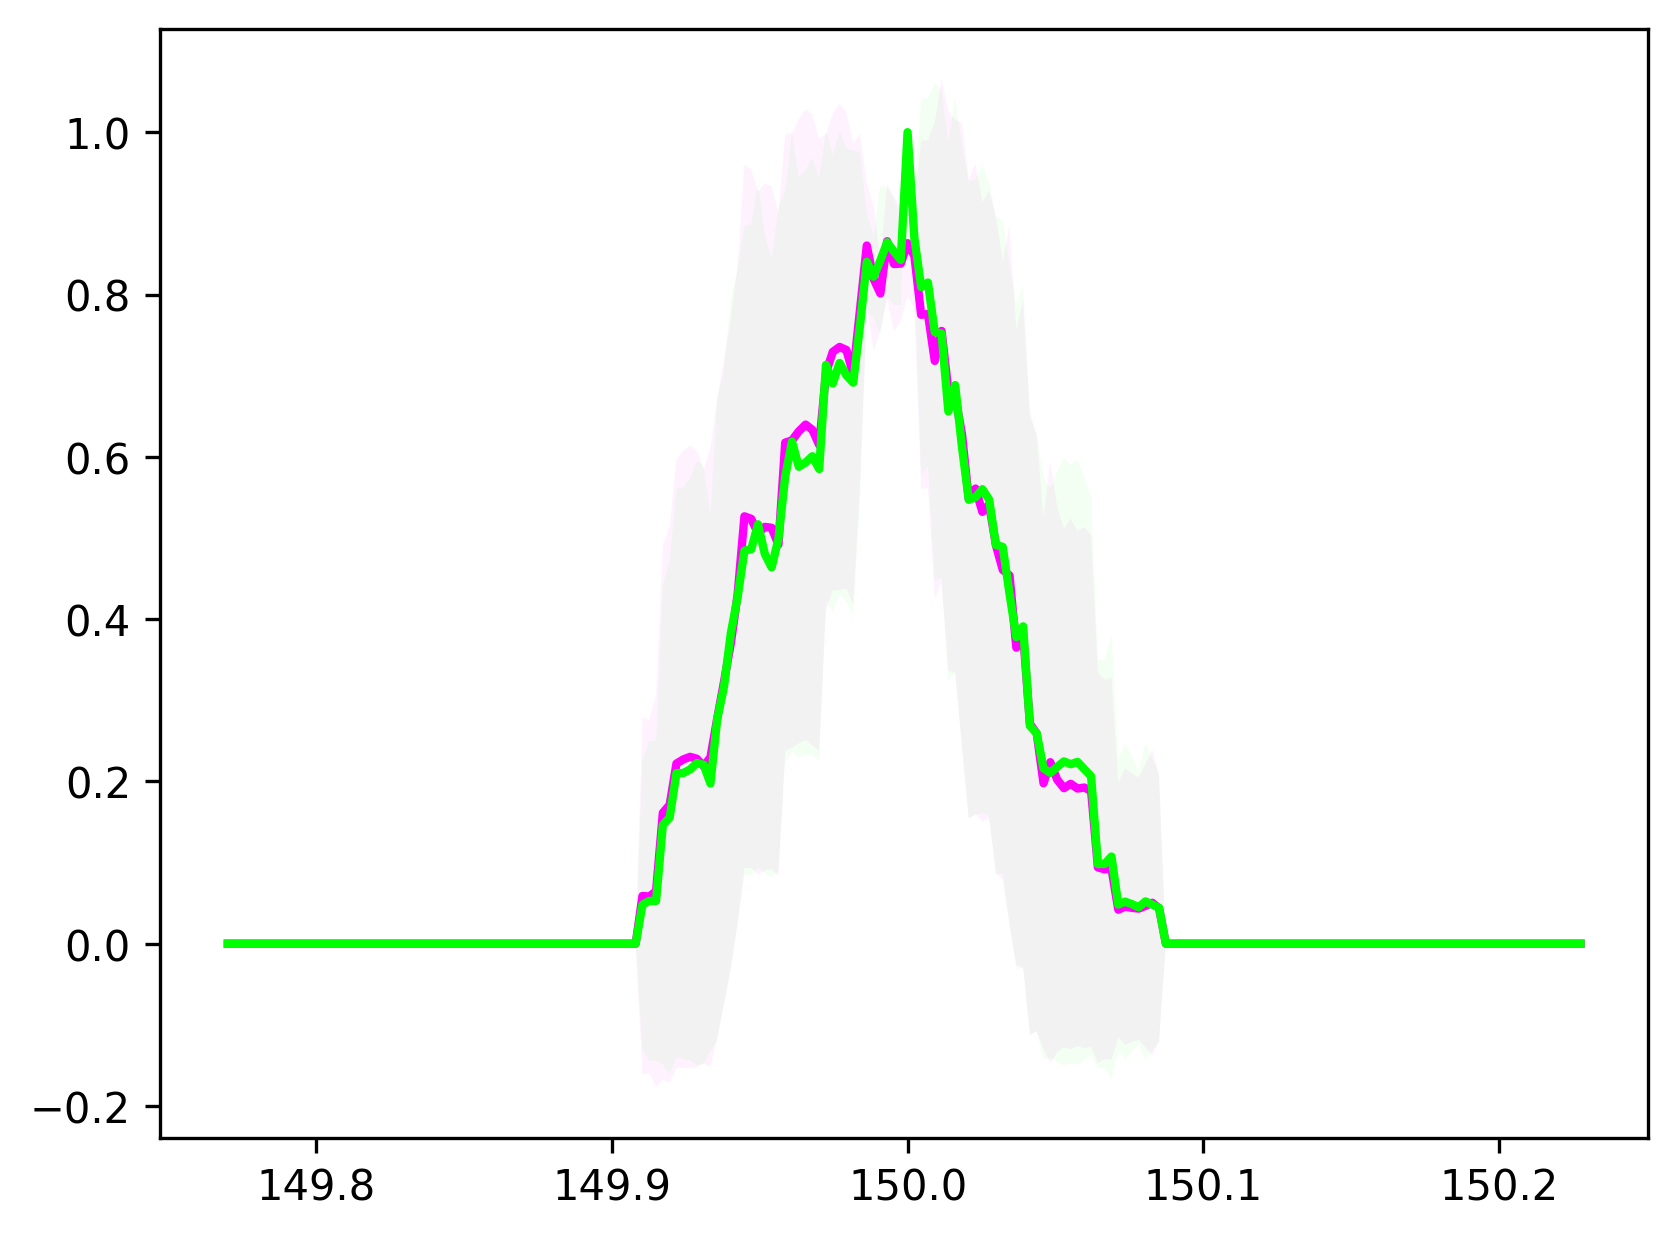

In [44]:
master, slave = createBufferForLifetimeCohort_normalized(track_id_arrays[4],0)

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2.3
cohortIdx = 3
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
m_buffer = master 
s_buffer = slave 

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)

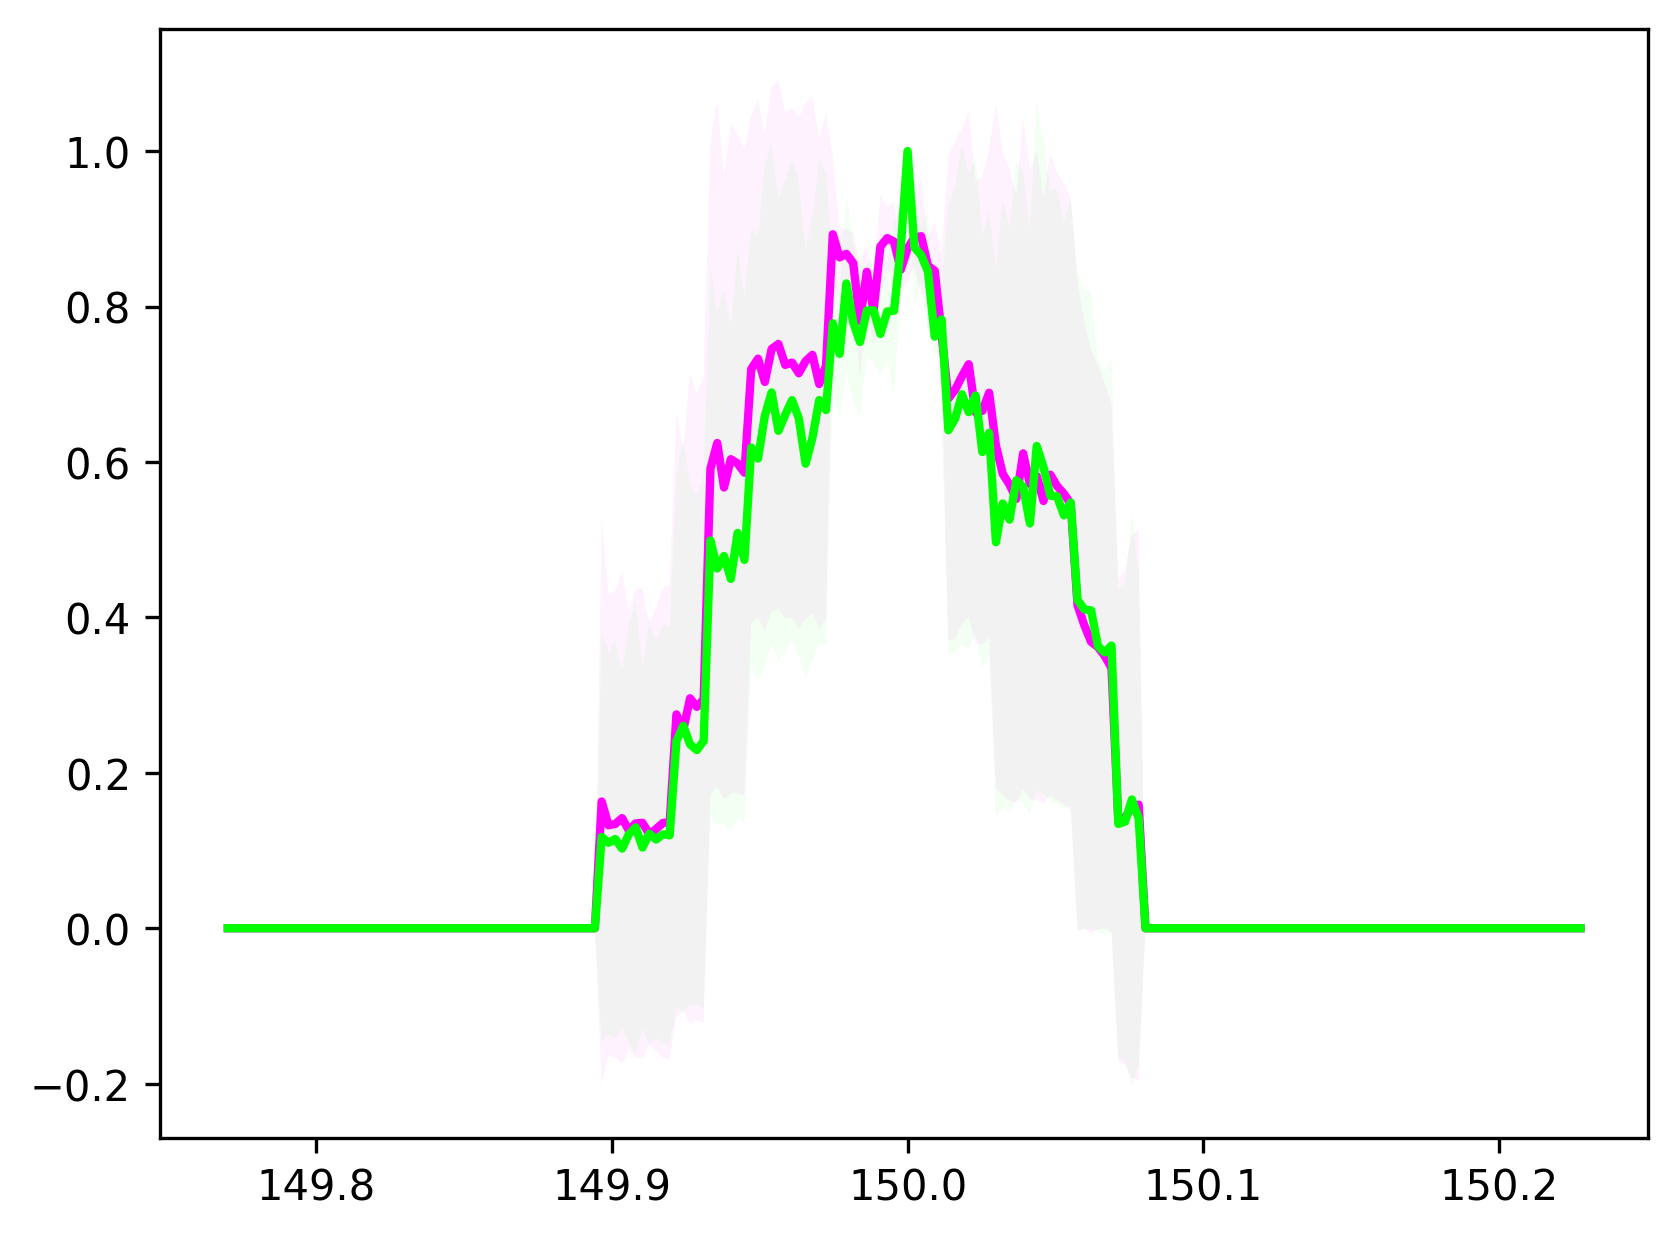

In [45]:
master, slave = createBufferForLifetimeCohort_normalized(track_id_arrays[5],0)

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


backgroundIntensity = 0
framerate_msec = 2.3
cohortIdx = 3
#m_buffer,s_buffer = cohortBuffers[cohortIdx]
m_buffer = master 
s_buffer = slave 

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[3],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[3],alpha=alph)